Optimizarea calității aerului în spații închise folosind date în timp real despre mediu 

Acest notebook conține etapele de prelucrare și analiză a unui set de date colectat dintr-un mediu interior și dintr-un mediu exterior, având ca scop extragerea de informații relevante privind condițiile de confort și calitatea aerului. Pe baza parametrilor înregistrați în timp real — precum temperatura, umiditatea, numărul de persoane, starea ventilației și a geamurilor — vom realiza curățarea, transformarea și vizualizarea datelor pentru a evidenția modele și posibile condiții critice.

Lucrarea susține implementarea unei abordări date → informație → cunoștințe, contribuind la dezvoltarea unui sistem inteligent de monitorizare și optimizare a mediului interior.

In [2]:
# Bibliotecile necesare pentru prelucrarea datelor
import pandas as pnd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations

Sunt datele pe care le-am preluat valide?
Dar ce înseamnă, de fapt, "valide"? Pentru a putea răspunde, este util să reformulăm întrebarea astfel:
"Sunt datele structurate într-o formă coerentă, cu variabile bine definite și valori corect alocate? Sau prezintă anomalii, lipsuri sau inconsecvențe?"

În această secțiune, vom analiza calitatea și consistența datasetului pentru a decide dacă poate fi folosit direct sau necesită preprocesare.

In [3]:
# Prima etapa in a prelucra datele este sa avem datele :)
ambient_df = pnd.read_csv('/workspaces/myfolder/MyDataToUse/PSITR_DATA_Complet_converted.csv')
print( ambient_df.head() ) # Pentru a vedea daca a mers

df_nou = ambient_df # pentru a lasa data frame-ul original si a observa diferentele cu cel modificat


                 Timestamp  Calitate aer Temperatura ( grad C )  \
0  2025-05-01 15:07:51 UTC            70                   26,5   
1  2025-05-01 15:07:53 UTC            69                   26,6   
2  2025-05-01 15:07:55 UTC            70                   26,4   
3  2025-05-01 15:07:57 UTC            70                   26,1   
4  2025-05-01 15:07:59 UTC            70                   26,1   

   Umiditate ( % ) Geam Deschis                   Locatie  Numar persoane  \
0               44           Da  Bucuresti, Calea Plevnei               3   
1               44           Da  Bucuresti, Calea Plevnei               3   
2               44           Da  Bucuresti, Calea Plevnei               3   
3               44           Da  Bucuresti, Calea Plevnei               3   
4               44           Da  Bucuresti, Calea Plevnei               3   

   Inchis Ventilatie activa Tip Incinta  Vreme  Trafic  
0  Inchis                Nu     Atelier  Senin  Scazut  
1  Inchis           

Datele au fost preluate.
Acum va urma Partea 1 din procesul de prelucrare: Curățarea datelor (Cleaning Data)
În această etapă, vom verifica structura datasetului, vom identifica eventualele valori lipsă, inconsistențe sau formate incorecte (de exemplu, temperaturi scrise cu virgulă în loc de punct) și vom pregăti datele pentru analiza propriu-zisă.

Scopul este de a transforma un set de date brut într-unul curat și coerent, care poate fi utilizat în siguranță pentru extragerea de informații relevante și luarea de decizii.

In [4]:
# Verificarea tipurilor de date pentru fiecare coloana
ambient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Timestamp               608 non-null    object
 1   Calitate aer            608 non-null    int64 
 2   Temperatura ( grad C )  608 non-null    object
 3   Umiditate ( % )         608 non-null    int64 
 4   Geam Deschis            608 non-null    object
 5   Locatie                 608 non-null    object
 6   Numar persoane          608 non-null    int64 
 7   Inchis                  608 non-null    object
 8   Ventilatie activa       608 non-null    object
 9   Tip Incinta             608 non-null    object
 10  Vreme                   608 non-null    object
 11  Trafic                  608 non-null    object
dtypes: int64(3), object(9)
memory usage: 57.1+ KB


După cum putem observa, variabilele „Timestamp”, „Temperatura ( grad C )”, „Umiditate ( % )” și „Calitate aer” sunt inițial înregistrate ca obiecte (object) sau numere întregi (int64), deși ele ar trebui să fie de tipuri specifice pentru a permite procesări corecte și precise:

- datetime64 pentru dată („Timestamp”),

- float64 pentru temperatură („Temperatura ( grad C )”),

- float64 pentru umiditate („Umiditate ( % )”),

- float64 pentru calitatea aerului („Calitate aer”) — dacă urmează să realizăm calcule statistice sau corelații.

Pentru a putea lucra corect cu aceste valori — fie că este vorba de filtrare, agregare, vizualizare sau corelare — este necesar să le convertim în formatele corespunzătoare.

In [5]:
# Conversia temperaturii din string în float
df_nou["Temperatura ( grad C )"] = df_nou["Temperatura ( grad C )"].str.replace(",", ".", regex=False).astype(float)

# Conversia timestamp-ului în datetime
df_nou["Timestamp"] = pnd.to_datetime(df_nou["Timestamp"], errors='coerce')

# Conversia umidității în float pentru calcule mai precise
df_nou["Umiditate ( % )"] = df_nou["Umiditate ( % )"].astype(float)

# Conversia calității aerului în float (dacă a fost importată greșit ca obiect sau întreg)
df_nou["Calitate aer"] = df_nou["Calitate aer"].astype(float)


In [6]:
# Verificare modificari 
df_nou.info()
print( df_nou["Timestamp"].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Timestamp               608 non-null    datetime64[ns, UTC]
 1   Calitate aer            608 non-null    float64            
 2   Temperatura ( grad C )  608 non-null    float64            
 3   Umiditate ( % )         608 non-null    float64            
 4   Geam Deschis            608 non-null    object             
 5   Locatie                 608 non-null    object             
 6   Numar persoane          608 non-null    int64              
 7   Inchis                  608 non-null    object             
 8   Ventilatie activa       608 non-null    object             
 9   Tip Incinta             608 non-null    object             
 10  Vreme                   608 non-null    object             
 11  Trafic                  608 non-null    objec

Modificarea a fost efecuata cu succes și acum am dori să schimbăm numele unor coloane pentru utilizarea lor mai facilă.

In [7]:
# Redenumim coloanele pentru simplitate
df_nou.rename(columns={
    "Temperatura ( grad C )": "Temperatura",
    "Umiditate ( % )": "Umiditate",
}, inplace=True)

# Verificăm că s-a aplicat corect
print(df_nou.columns)


Index(['Timestamp', 'Calitate aer', 'Temperatura', 'Umiditate', 'Geam Deschis',
       'Locatie', 'Numar persoane', 'Inchis', 'Ventilatie activa',
       'Tip Incinta', 'Vreme', 'Trafic'],
      dtype='object')


### Separarea datei și orei din „Timestamp”

Pentru o analiză mai flexibilă a evoluției în timp, am separat coloana „Timestamp” în două coloane distincte:

- **„Data”**: conține doar data calendaristică (`YYYY-MM-DD`);
- **„Timpul”**: conține doar ora (`HH:MM:SS`).

Această separare este utilă atunci când dorim să grupăm valorile pe zile, să analizăm variațiile pe ore sau să filtrăm date într-un interval specific.


In [8]:
# Convertim coloana Timestamp în datetime dacă nu e deja
df_nou["Timestamp"] = pnd.to_datetime(df_nou["Timestamp"], errors="coerce")

# Creăm două coloane separate: Data și Timpul
df_nou["Data"] = df_nou["Timestamp"].dt.date
df_nou["Timpul"] = df_nou["Timestamp"].dt.time

# Verificăm rezultatul
df_nou[["Timestamp", "Data", "Timpul"]].head()


Timestamp        Data    Timpul
0 2025-05-01 15:07:51+00:00  2025-05-01  15:07:51
1 2025-05-01 15:07:53+00:00  2025-05-01  15:07:53
2 2025-05-01 15:07:55+00:00  2025-05-01  15:07:55
3 2025-05-01 15:07:57+00:00  2025-05-01  15:07:57
4 2025-05-01 15:07:59+00:00  2025-05-01  15:07:59

În următorul pas de curățare a datelor, urmărim să verificăm dacă valorile din coloanele categorice sunt exprimate într-un format consistent, astfel încât să evităm confuziile cauzate de termeni care, deși diferit scriși, reprezintă în esență același lucru (ex: „da”, „Da”, „DA”).

In [9]:
# Afisam valorile unice pentru fiecare coloana de tip object sau category
for col in df_nou.select_dtypes(include=['object', 'category']).columns:
    print(f"\n Coloana: {col}")
    print(df_nou[col].unique())
    



 Coloana: Geam Deschis
['Da' 'Nu']

 Coloana: Locatie
['Bucuresti, Calea Plevnei' 'Pitesti, Cartier Craiovei'
 'Bucuresti, Grozavesti' 'Bucuresti, Politehnica ACS']

 Coloana: Inchis
['Inchis']

 Coloana: Ventilatie activa
['Nu' 'Da']

 Coloana: Tip Incinta
['Atelier' 'Aer liber' 'Camera camin' 'Sala laborator']

 Coloana: Vreme
['Senin' 'Innorat' 'Partial Innorat']

 Coloana: Trafic
['Scazut' 'Scazut ']

 Coloana: Data
[datetime.date(2025, 5, 1) datetime.date(2025, 5, 5)
 datetime.date(2025, 5, 11) datetime.date(2025, 5, 13)]

 Coloana: Timpul
[datetime.time(15, 7, 51) datetime.time(15, 7, 53)
 datetime.time(15, 7, 55) datetime.time(15, 7, 57)
 datetime.time(15, 7, 59) datetime.time(15, 8, 1) datetime.time(15, 8, 3)
 datetime.time(15, 8, 5) datetime.time(15, 8, 7) datetime.time(15, 8, 9)
 datetime.time(15, 8, 11) datetime.time(15, 8, 13)
 datetime.time(15, 8, 15) datetime.time(15, 8, 17)
 datetime.time(15, 8, 19) datetime.time(15, 8, 21)
 datetime.time(15, 8, 23) datetime.time(15, 8,

Având în vedere că coloana „Inchis” conține exclusiv valoarea „Inchis”, vom modifica DataFrame-ul astfel: vom elimina această coloană în întregime, deoarece este irelevantă pentru analiză.

In [10]:
# Eliminam coloana "Inchis" deoarece contine o singura valoare si este irelevanta
df_nou.drop(columns=["Inchis"], inplace=True)

# Verificam ca a fost eliminata
print(df_nou.columns)

Index(['Timestamp', 'Calitate aer', 'Temperatura', 'Umiditate', 'Geam Deschis',
       'Locatie', 'Numar persoane', 'Ventilatie activa', 'Tip Incinta',
       'Vreme', 'Trafic', 'Data', 'Timpul'],
      dtype='object')


Datele nu prezintă valori redundante în coloane așa că acum ne propunem să verificăm dacă datasetul conține valori lipsă și dacă este necesară o prelucrare suplimentară pentru completarea sau gestionarea acestora.

In [11]:
# Verificam daca exista valori lipsa in dataset
missing_values = df_nou.isnull().sum()

# Afisam doar coloanele care au valori lipsa
print("Coloane cu valori lipsa:\n")
print(missing_values[missing_values > 0])


Coloane cu valori lipsa:

Series([], dtype: int64)


După cum se poate observa, nu există valori lipsă în setul de date, astfel că ne vom concentra atenția asupra identificării eventualelor înregistrări duplicate.

In [12]:
# Verificam numarul de randuri duplicate
duplicate_count = df_nou.duplicated().sum()
print(f"Numar de inregistrari duplicate: {duplicate_count}")

Numar de inregistrari duplicate: 0


În continuare, ne vom îndrepta atenția asupra distribuției datelor numerice din setul nostru ce constituie, de fapt, a doua etapă în prelucrarea acestora. Mai exact, vom realiza o analiză exploratorie (exploratory data analysis – EDA) pentru a înțelege mai bine comportamentul variabilelor și eventualele relații dintre acestea.

In [13]:
# PASUL 1 – Vizualizare generala a setului de date
# Dimensiunea datasetului (număr de rânduri și coloane)
print("Dimensiune dataset:", df_nou.shape)

# Tipurile de date pentru fiecare coloană
print("\nTipuri de date:")
print(df_nou.dtypes)

# Statistici descriptive pentru coloanele numerice
print("\nStatistici descriptive:")
display(df_nou.describe())


Dimensiune dataset: (608, 13)

Tipuri de date:
Timestamp            datetime64[ns, UTC]
Calitate aer                     float64
Temperatura                      float64
Umiditate                        float64
Geam Deschis                      object
Locatie                           object
Numar persoane                     int64
Ventilatie activa                 object
Tip Incinta                       object
Vreme                             object
Trafic                            object
Data                              object
Timpul                            object
dtype: object

Statistici descriptive:


Calitate aer  Temperatura   Umiditate  Numar persoane
count    608.000000   608.000000  608.000000      608.000000
mean      71.878289    24.556414   55.613487        3.256579
std       35.260924     3.083665   15.232312        3.449799
min       53.000000     0.800000    0.000000        0.000000
25%       61.000000    24.200000   45.000000        2.000000
50%       66.000000    25.500000   47.000000        3.000000
75%       70.000000    26.400000   70.000000        3.000000
max      675.000000    27.900000   86.000000       16.000000

Pentru a înțelege mai bine comportamentul variabilelor numerice din dataset, analizăm distribuția acestora. Ne interesează:

- forma distribuției (simetrică, asimetrică, concentrată etc.),

- identificarea valorilor extreme (outlieri),

- variația și dispersia datelor.

Vom folosi histograme pentru a vizualiza distribuția fiecărei variabile numerice și boxploturi pentru a evidenția eventualele valori anormale.- 

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


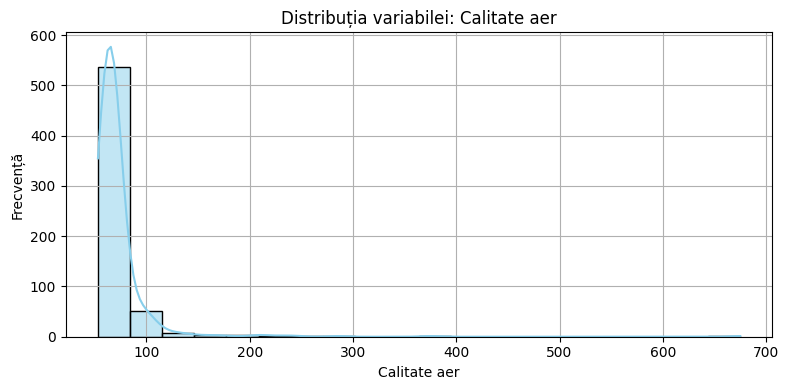

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


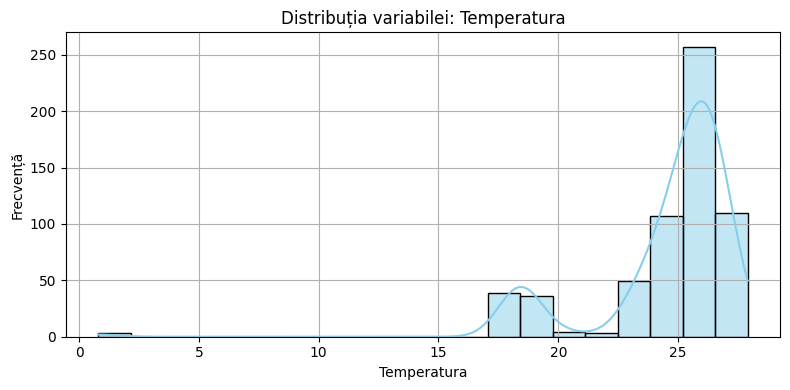

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


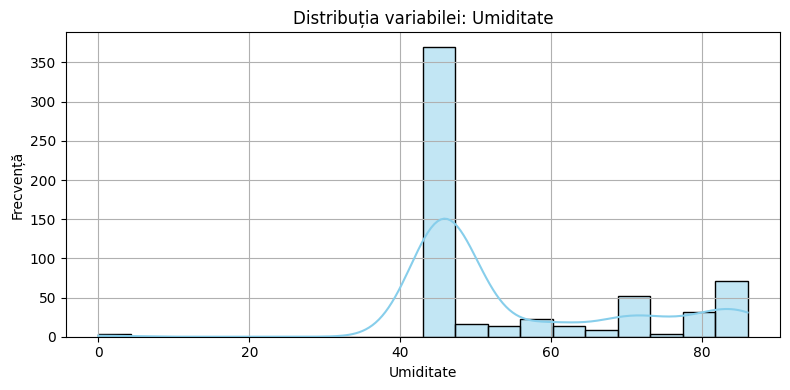

In [14]:
# PASUL 2 – Analiza distributiei variabilelor numerice

# Selectăm coloanele numerice
num_cols = df_nou.select_dtypes(include='float64').columns.tolist()

# Histograme pentru distribuția fiecărei variabile numerice
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_nou[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribuția variabilei: {col}')
    plt.xlabel(col)
    plt.ylabel("Frecvență")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


După cum se poate observa, distribuțiile variabilelor numerice sunt în general asimetrice (right-skewed sau left-skewed). Această neregularitate poate fi explicată prin faptul că datele au fost colectate din locații diferite, iar apoi agregate într-un singur set de date. Astfel, caracteristicile fiecărui spațiu în parte influențează distribuțiile generale, ceea ce face dificilă o interpretare unitară.

Pentru a obține o imagine mai clară asupra distribuției variabilelor numerice, am segmentat datele în funcție de locație. Această abordare permite evidențierea caracteristicilor specifice fiecărui spațiu, evitând interpretările eronate care pot apărea în urma agregării globale.


Analiza pentru locatia: Bucuresti, Calea Plevnei


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


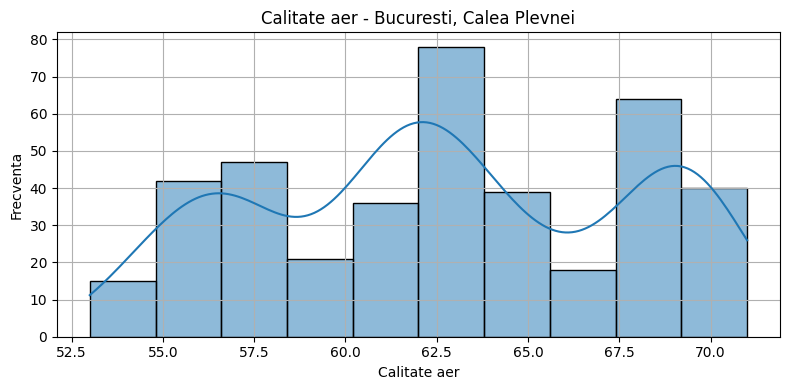

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


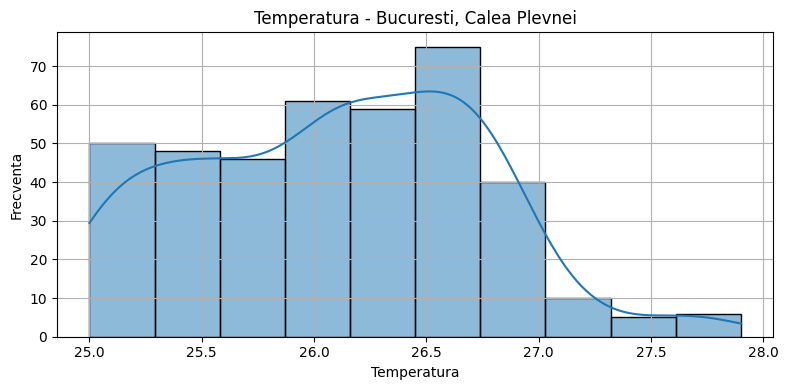

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


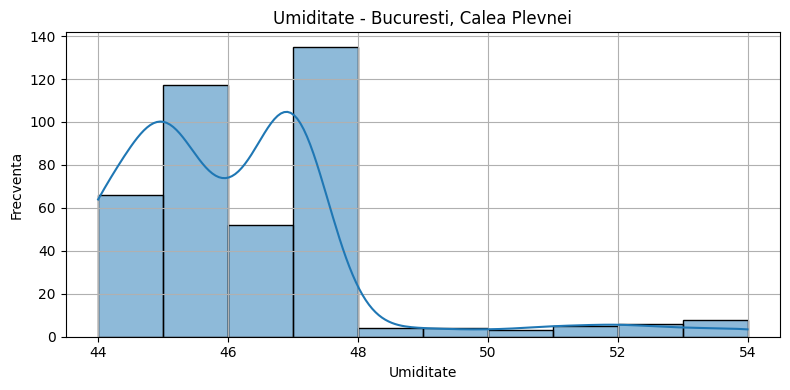


Analiza pentru locatia: Pitesti, Cartier Craiovei


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


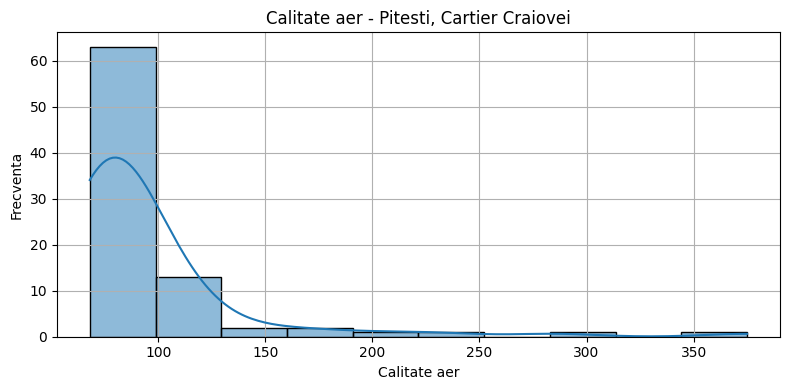

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


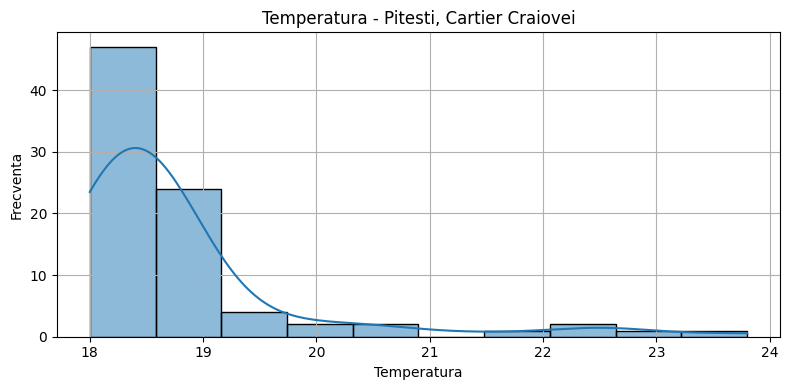

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


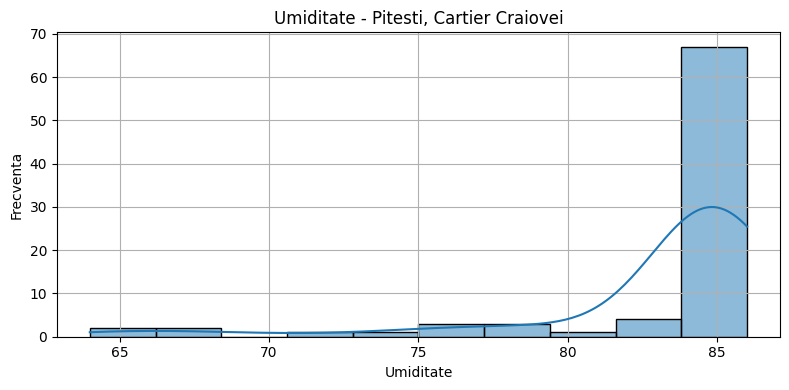


Analiza pentru locatia: Bucuresti, Grozavesti


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


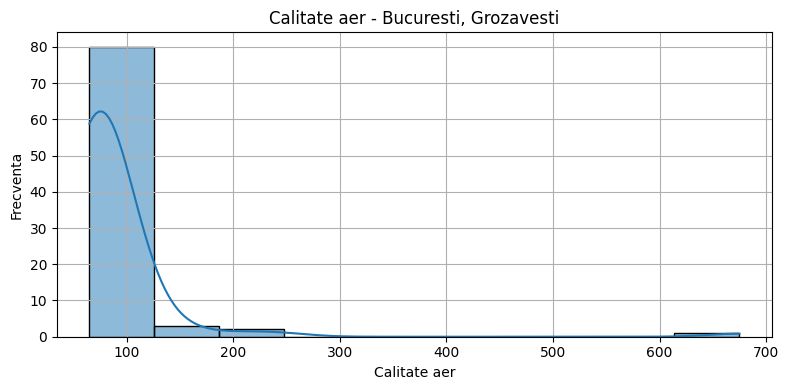

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


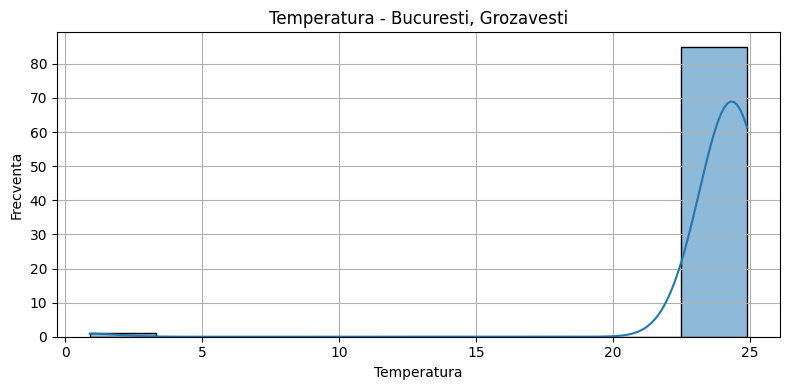

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


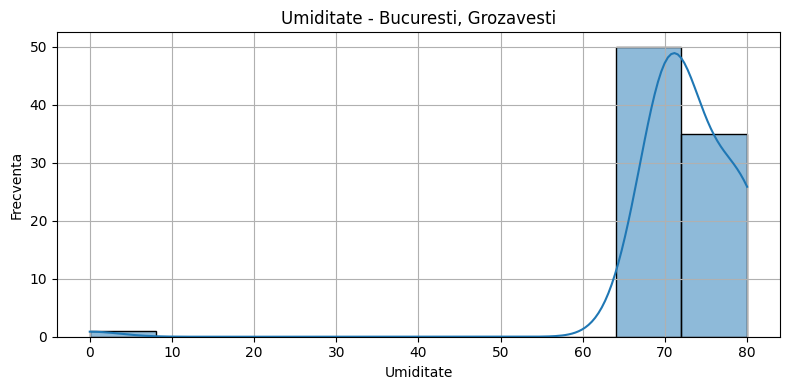


Analiza pentru locatia: Bucuresti, Politehnica ACS


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


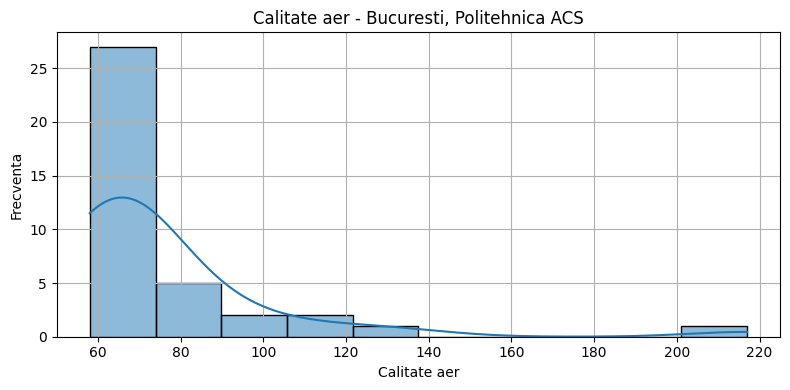

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


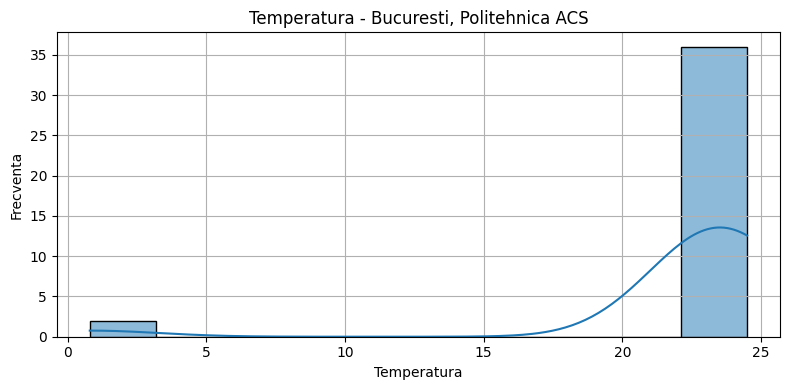

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


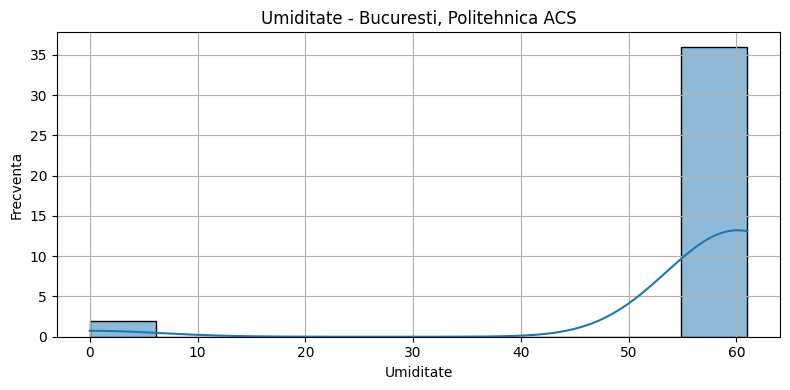

In [15]:
# Lista variabilelor numerice
numeric_cols = df_nou.select_dtypes(include='float64').columns.tolist()

# Lista locațiilor unice
locatii = df_nou["Locatie"].unique()

# Generăm histograme pentru fiecare variabilă numerică, pe fiecare locație
for locatie in locatii:
    subset = df_nou[df_nou["Locatie"] == locatie]
    print(f"\nAnaliza pentru locatia: {locatie}")
    
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(subset[col], kde=True, bins=10)
        plt.title(f'{col} - {locatie}')
        plt.xlabel(col) 
        plt.ylabel("Frecventa")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

De remarcat și de această dată este faptul că distribuțiile variabilelor analizate prezintă forme asimetrice evidente. Pentru a obține o distribuție mai uniformă și o înțelegere mai clară asupra variației interne, este important să identificăm valorile extreme (outlieri) care pot distorsiona analiza. Astfel, în continuare vom realiza boxplot-uri pentru fiecare variabilă numerică, segmentate pe locație, cu scopul de a evidenția aceste valori și de a evalua dacă sunt necesare ajustări suplimentare.

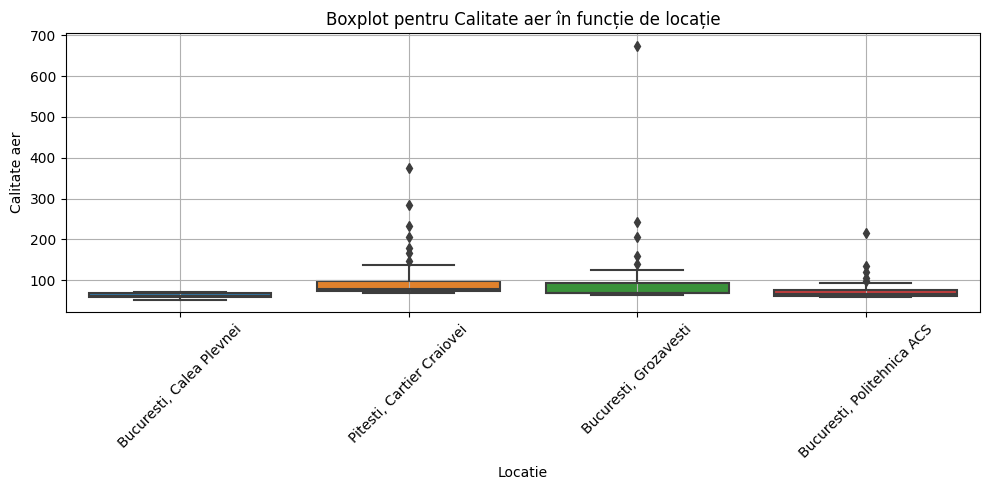

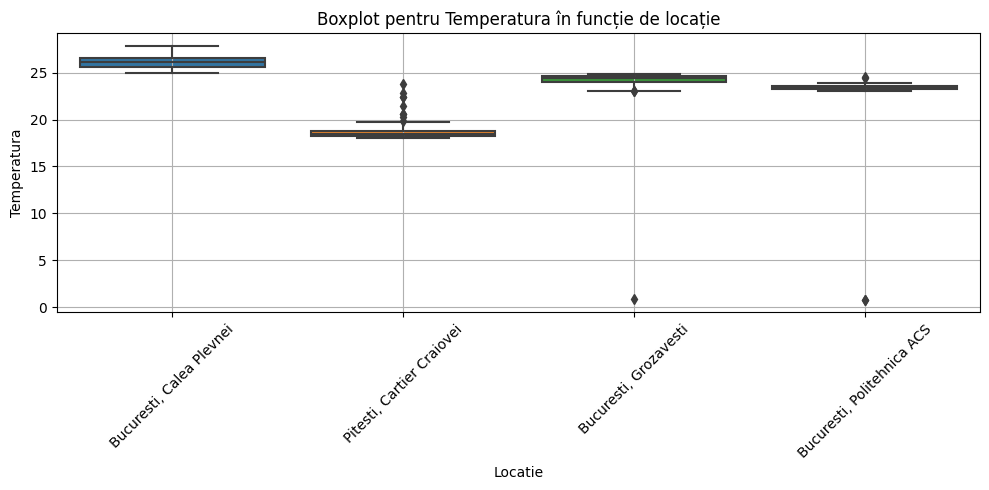

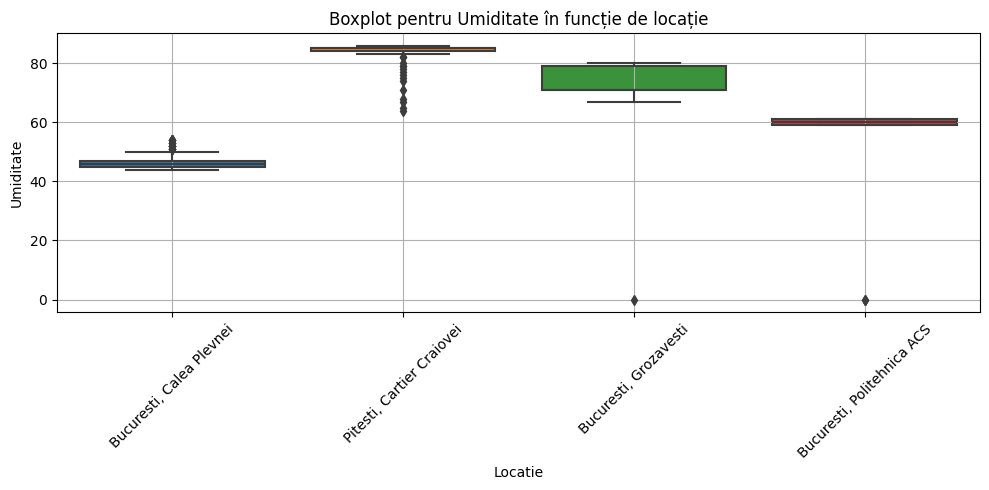

In [16]:
# Generăm boxplot-uri pentru fiecare variabilă numerică, pe fiecare locație
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_nou, x="Locatie", y=col)
    plt.title(f'Boxplot pentru {col} în funcție de locație')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Se observă prezența unui număr semnificativ de outlieri în variabilele analizate. Aceștia pot afecta negativ acuratețea rezultatelor statistice și vizualizarea generală a datelor. Prin urmare, este justificată eliminarea valorilor extreme, pentru a obține o analiză mai fiabilă și reprezentativă.

In [17]:
# Funcție pentru eliminarea outlierilor pe baza metodei IQR
def elimina_outlieri_iqr(df, coloane):
    df_fara_outlieri = df.copy()
    for col in coloane:
        Q1 = df_fara_outlieri[col].quantile(0.25)
        Q3 = df_fara_outlieri[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Păstrăm doar valorile în intervalul intercuartil
        df_fara_outlieri = df_fara_outlieri[(df_fara_outlieri[col] >= lower_bound) & (df_fara_outlieri[col] <= upper_bound)]
    return df_fara_outlieri

# Aplicam functia asupra variabilelor numerice
coloane_numerice = df_nou.select_dtypes(include='number').columns.tolist()
df_nou_clean = elimina_outlieri_iqr(df_nou, coloane_numerice)

# Afisam dimensiunea noului set de date
print("Dimensiune dupa eliminarea outlierilor:", df_nou_clean.shape)


Dimensiune dupa eliminarea outlierilor: (381, 13)


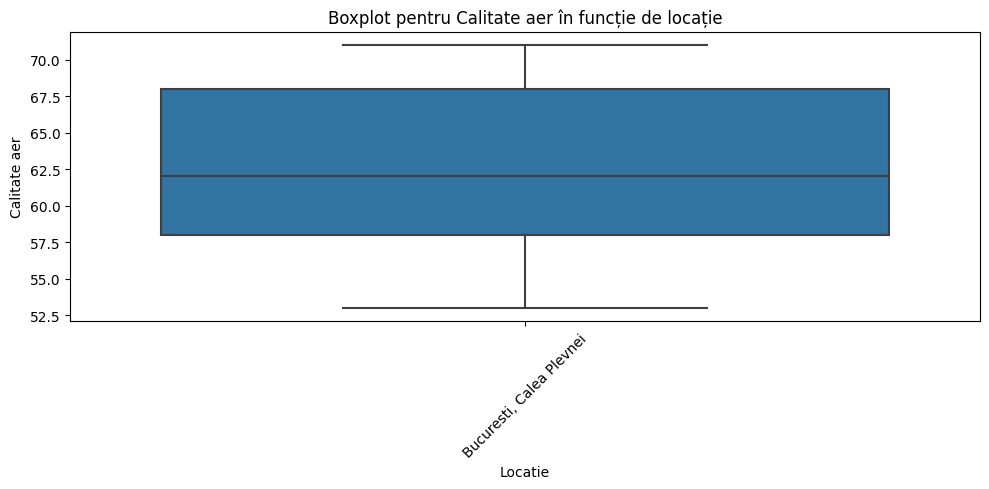

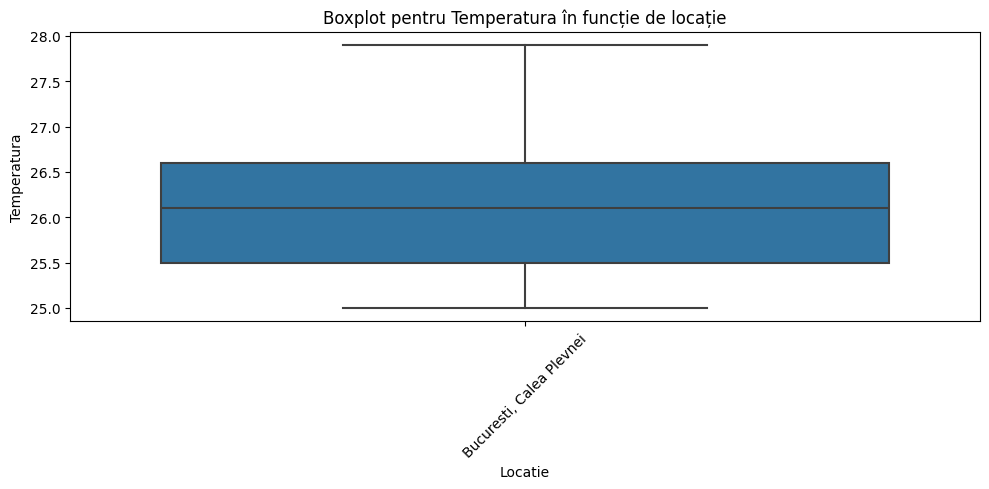

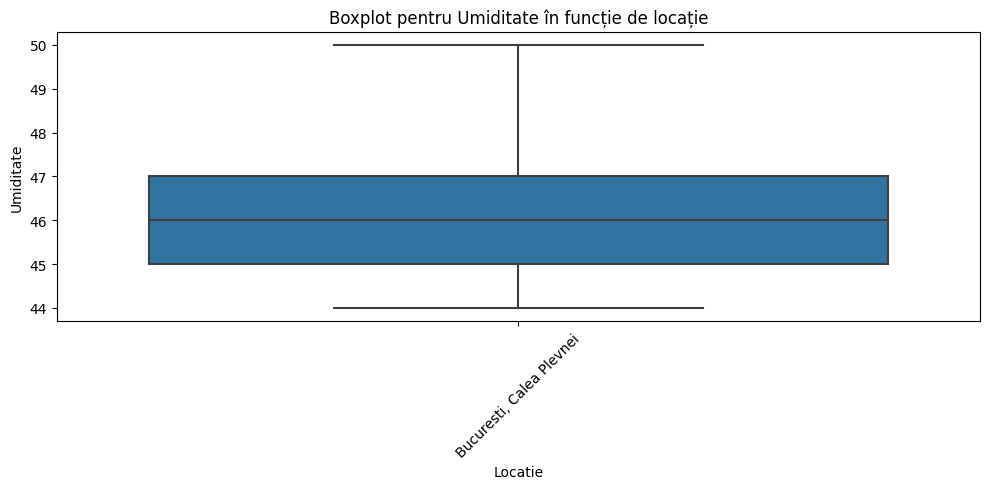

In [18]:
# Generăm boxplot-uri pentru fiecare variabilă numerică, pe fiecare locație
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_nou_clean, x="Locatie", y=col)
    plt.title(f'Boxplot pentru {col} în funcție de locație')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Analiza pentru locatia: Bucuresti, Calea Plevnei


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


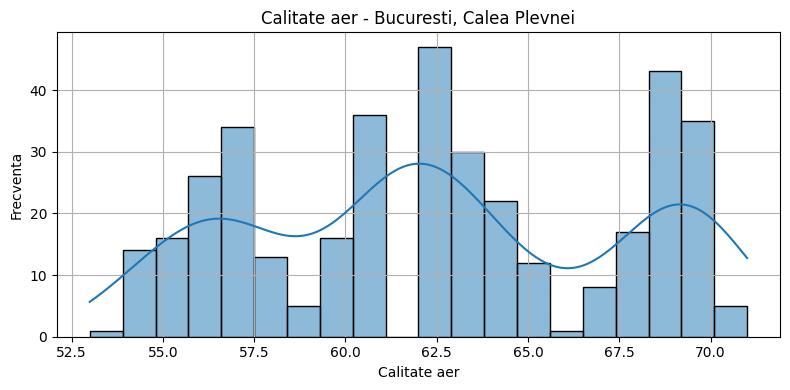

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


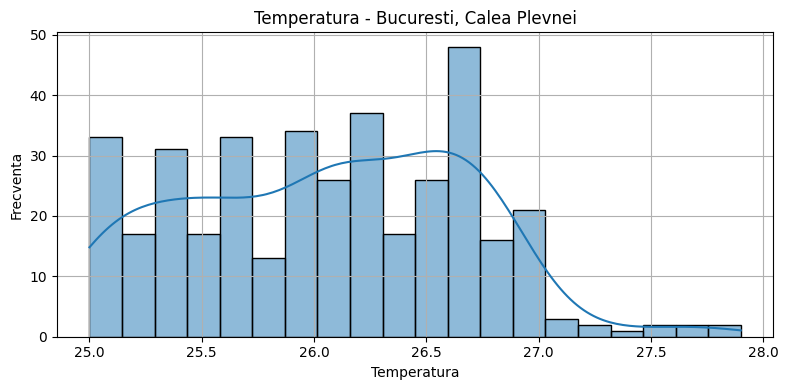

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


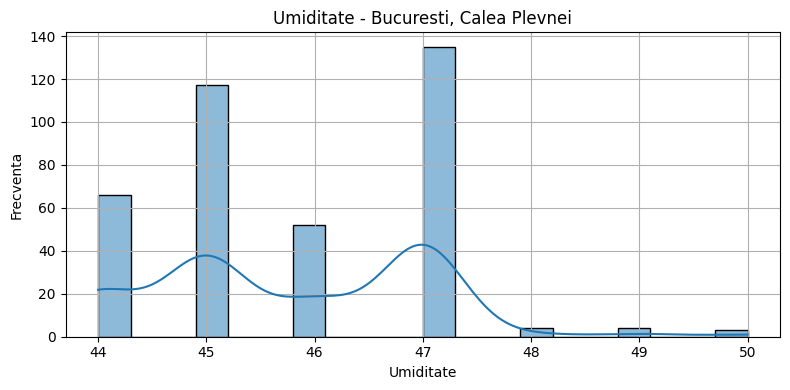


Analiza pentru locatia: Pitesti, Cartier Craiovei


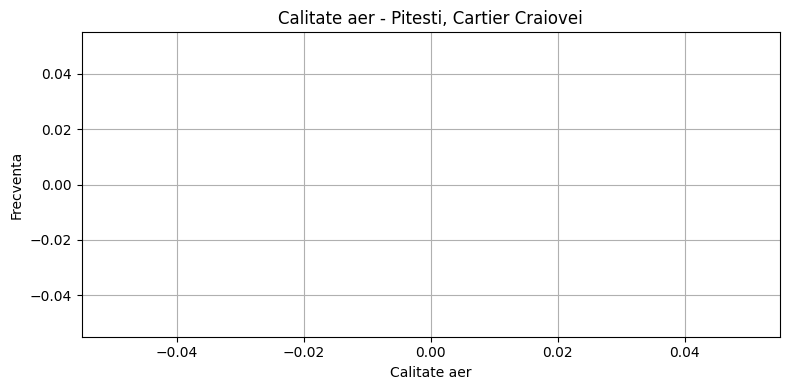

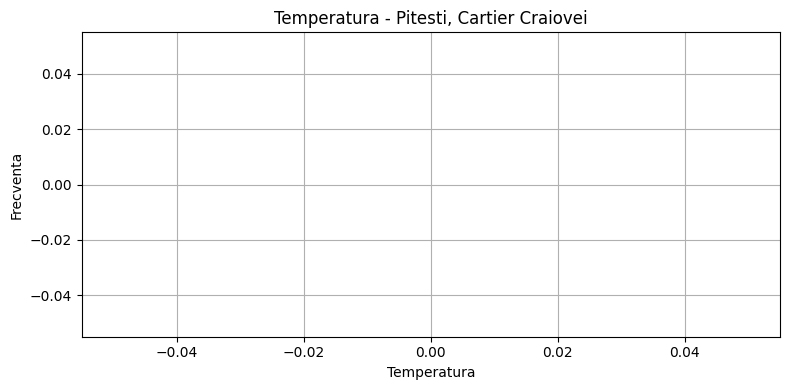

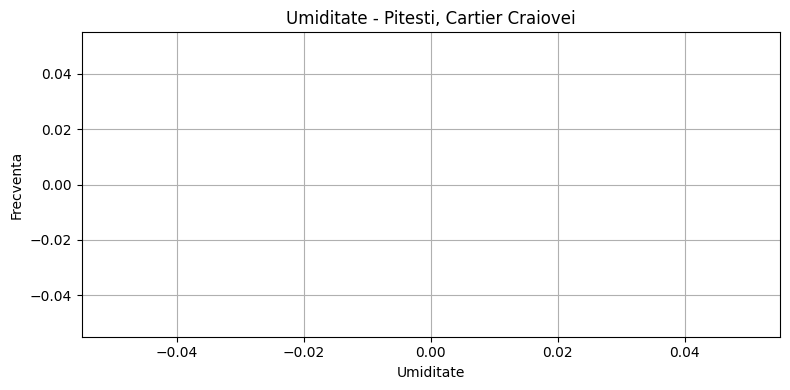


Analiza pentru locatia: Bucuresti, Grozavesti


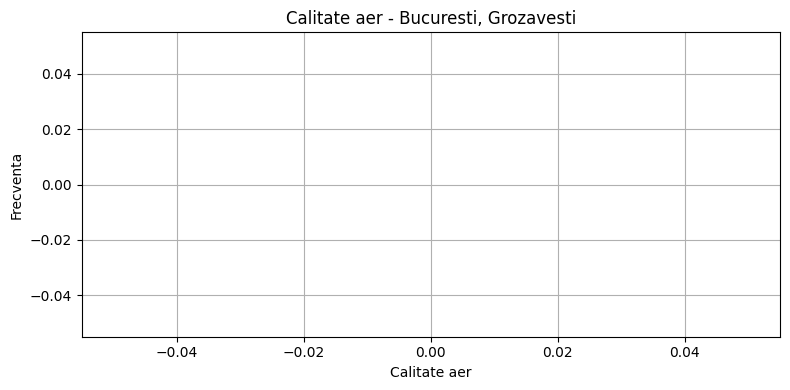

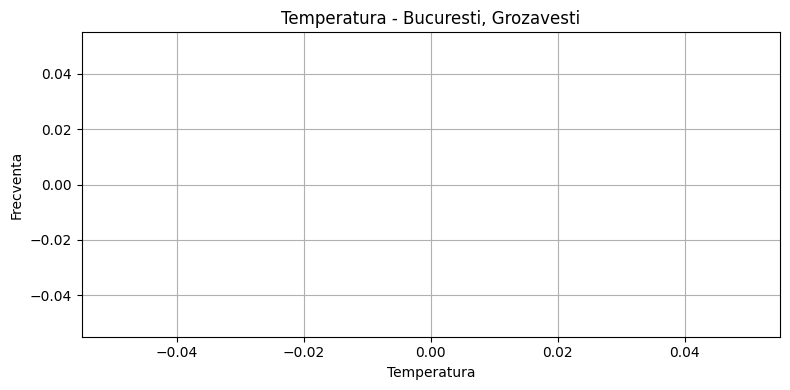

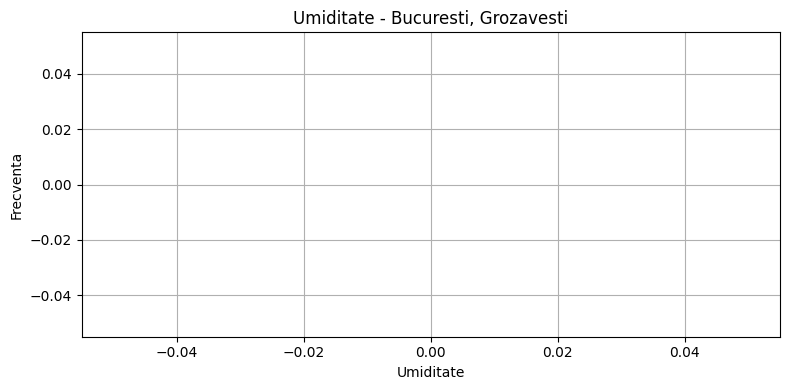


Analiza pentru locatia: Bucuresti, Politehnica ACS


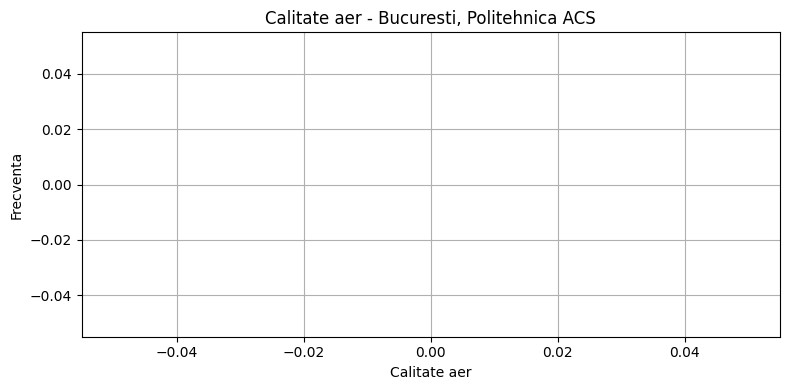

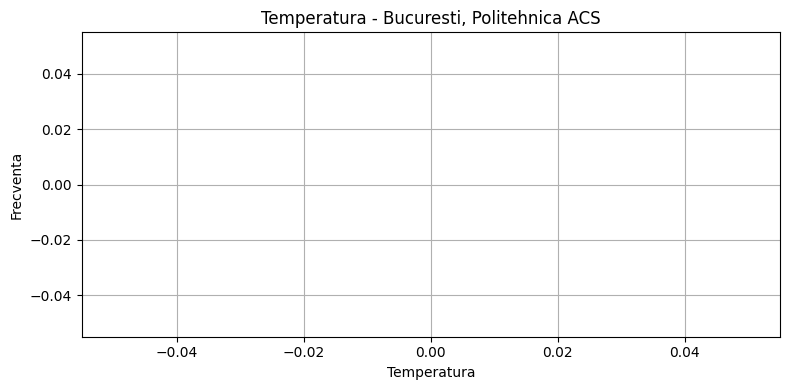

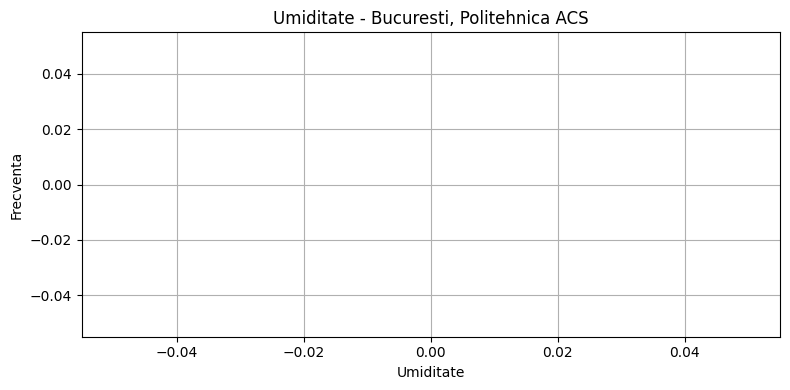

In [19]:
# Generăm histograme pentru fiecare variabilă numerică, pe fiecare locație
for locatie in locatii:
    subset = df_nou_clean[df_nou_clean["Locatie"] == locatie]
    print(f"\nAnaliza pentru locatia: {locatie}")
    
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(subset[col], kde=True, bins=20)
        plt.title(f'{col} - {locatie}')
        plt.xlabel(col) 
        plt.ylabel("Frecventa")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

După eliminarea outlierilor, au dispărut complet 3 locații din setul de date, fapt ce subminează considerabil valabilitatea și reprezentativitatea analizei. Din acest motiv, am decis să păstrăm datele în forma lor originală, fără eliminarea valorilor extreme, pentru a menține coerența și acoperirea completă a locațiilor și vom continua cu următorul pas al analizei. 

În această etapă analizăm variabilele categorice pentru a înțelege distribuția frecvențelor și caracteristicile generale ale fiecărei categorii. Scopul este de a observa dacă anumite valori domină (ex: „Geam Deschis” = Da în majoritatea cazurilor) și dacă distribuția este echilibrată. Aceste informații sunt utile pentru interpretare, dar și pentru a decide dacă este necesară recodificarea sau echilibrarea unor categorii în pașii următori.

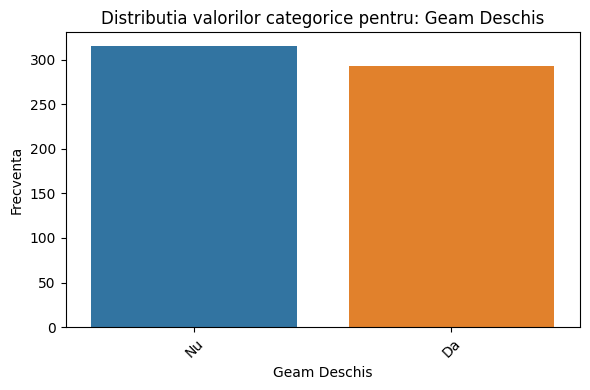

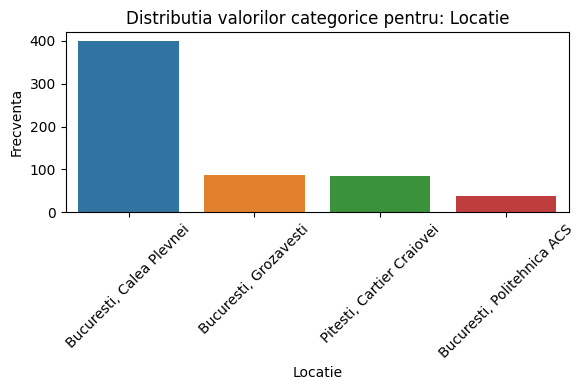

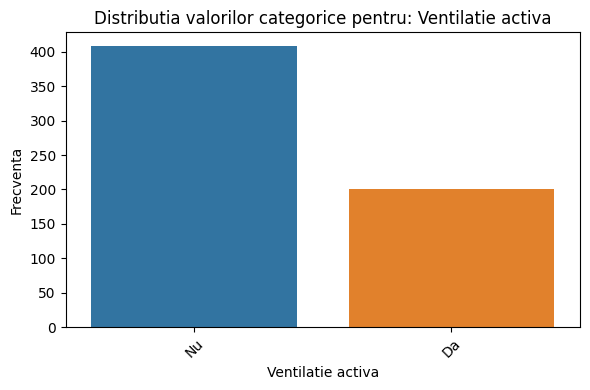

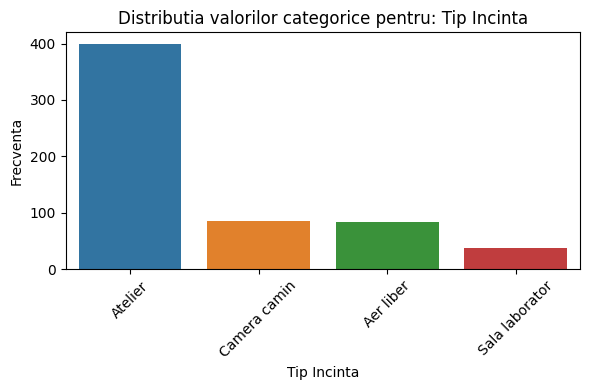

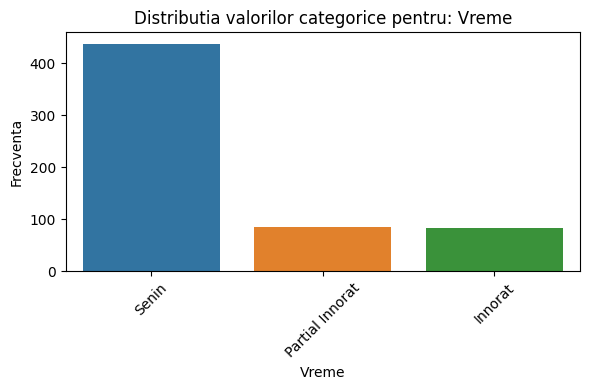

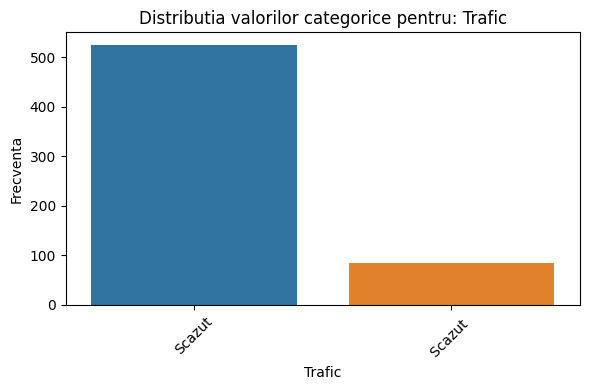

In [20]:
# Selectam coloanele de tip object (categorice)
categorice = df_nou.select_dtypes(include='object').columns.tolist()

# Eliminam coloanele care nu sunt utile în acest context (ex: Timestamp deja separat)
exclus = ["Data", "Timpul"]
categorice = [col for col in categorice if col not in exclus]

# Afisam distributia pentru fiecare coloana categorica
for col in categorice:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_nou, x=col, order=df_nou[col].value_counts().index)
    plt.title(f'Distributia valorilor categorice pentru: {col}')
    plt.xlabel(col)
    plt.ylabel('Frecventa')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

În urma analizei grafice de mai sus, se pot evidenția următoarele aspecte:

- Coloanele „Locatie”, „Tip Incinta” și „Vreme” prezintă o frecvență scăzută pentru anumite categorii, ceea ce indică o variație redusă a acestor variabile în cadrul datasetului. Acest dezechilibru poate influența ușor interpretările viitoare, întrucât distribuțiile nu sunt uniform reprezentate.

- În plus, coloana „Trafic” prezintă o anomalie: aceeași valoare „Scăzut” apare de două ori, fiind percepută ca distinctă din cauza unor diferențe de formatare (spații sau caractere invizibile). Vom corecta acest aspect în pasul următor pentru a uniformiza datele categorice.

['Scazut']


<Axes: xlabel='Trafic', ylabel='count'>

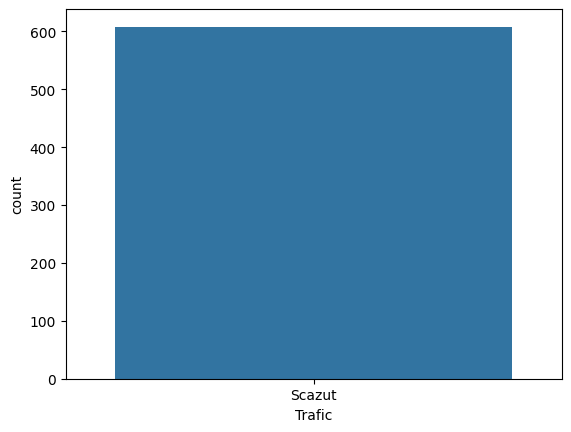

In [21]:
# Eliminam spațtile și standardizam scrierea
df_nou["Trafic"] = df_nou["Trafic"].astype(str).str.strip().str.capitalize()

# Verificam valorile unice după curatare
print(df_nou["Trafic"].unique())

# Verificam si cu countplot sa vedem daca s-a aplicat modificarea
sns.countplot(data=df_nou, x="Trafic")


Următoarea secțiune se va concentra pe analiza corelațiilor dintre variabilele din setul de date. Scopul este de a evidenția relațiile dintre acestea și de a construi o înțelegere mai profundă a comportamentului lor, pe baza căreia să ne putem fundamenta concluziile și interpretările ulterioare.

In [22]:
# Lista locatiilor unice
locatii = df_nou["Locatie"].unique()

# Coloane numerice de interes
num_cols = ["Calitate aer", "Temperatura", "Umiditate"]

# Calculam si afisam corelatia pentru fiecare locatie - Nu am folosit heatmaps, deoarece nu era prezentata complet informatia
for locatie in locatii:
    subset = df_nou[df_nou["Locatie"] == locatie]
    subset = subset[num_cols].dropna()

    print(f"\n===== Matrice de corelatie pentru locatia: {locatie} =====\n")
    print(subset.corr().round(2))



===== Matrice de corelatie pentru locatia: Bucuresti, Calea Plevnei =====

              Calitate aer  Temperatura  Umiditate
Calitate aer          1.00        -0.21      -0.05
Temperatura          -0.21         1.00       0.14
Umiditate            -0.05         0.14       1.00

===== Matrice de corelatie pentru locatia: Pitesti, Cartier Craiovei =====

              Calitate aer  Temperatura  Umiditate
Calitate aer          1.00         0.89      -0.94
Temperatura           0.89         1.00      -0.96
Umiditate            -0.94        -0.96       1.00

===== Matrice de corelatie pentru locatia: Bucuresti, Grozavesti =====

              Calitate aer  Temperatura  Umiditate
Calitate aer          1.00        -0.88      -0.69
Temperatura          -0.88         1.00       0.91
Umiditate            -0.69         0.91       1.00

===== Matrice de corelatie pentru locatia: Bucuresti, Politehnica ACS =====

              Calitate aer  Temperatura  Umiditate
Calitate aer          1.00       

De remarcat este faptul că cele trei variabile numerice prezintă corelații diferite de la o locație la alta, unele dintre ele fiind chiar semnificative. Acest aspect este interesant și merită explorat în profunzime, motiv pentru care vom continua cu analiza grafică a dependenței dintre variabile.


Scatter plots pentru locatia: Bucuresti, Calea Plevnei


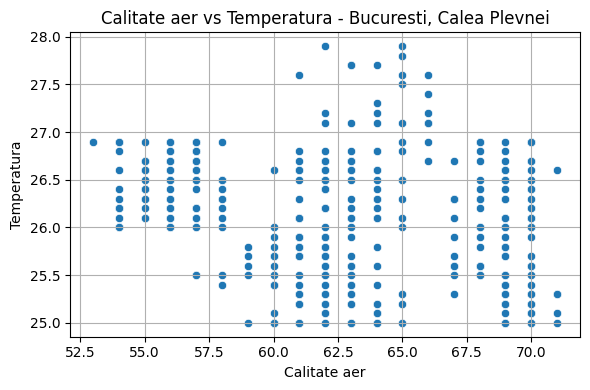

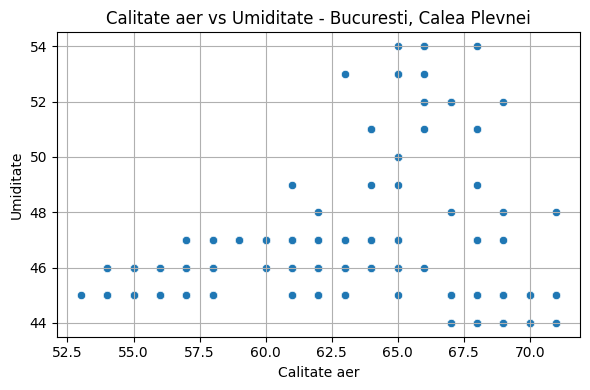

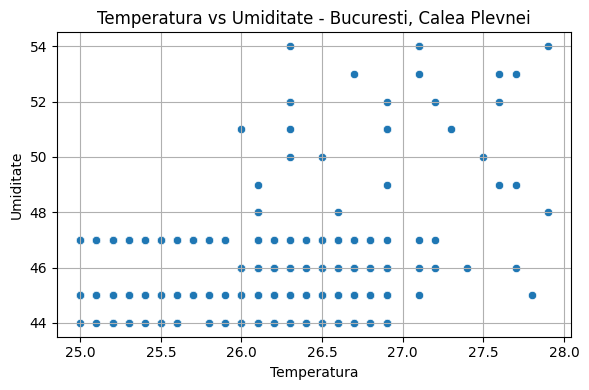


Scatter plots pentru locatia: Pitesti, Cartier Craiovei


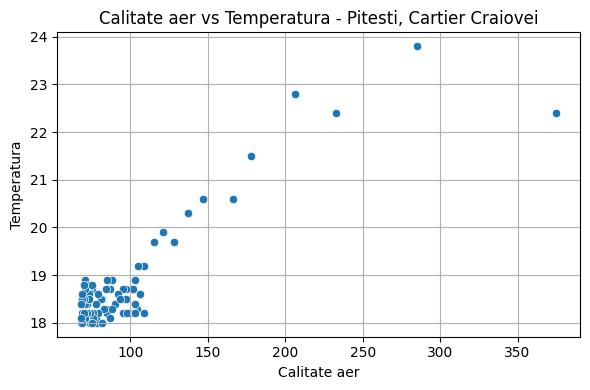

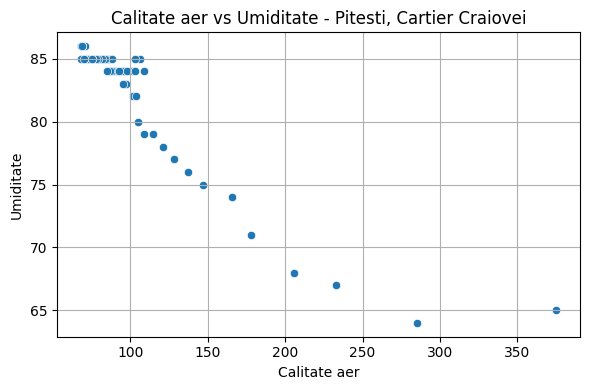

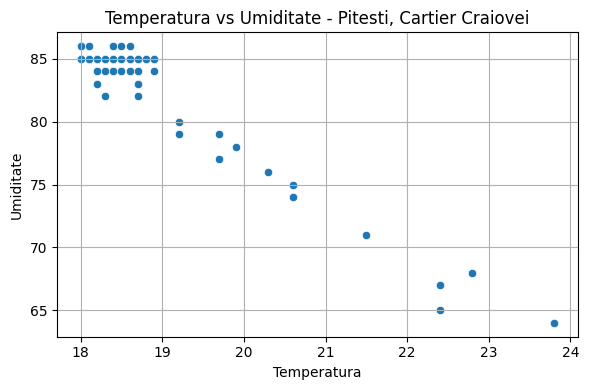


Scatter plots pentru locatia: Bucuresti, Grozavesti


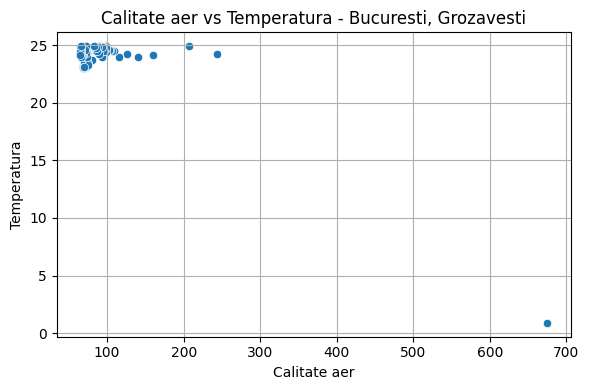

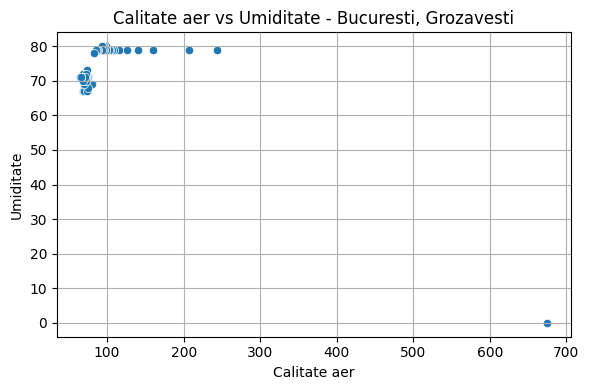

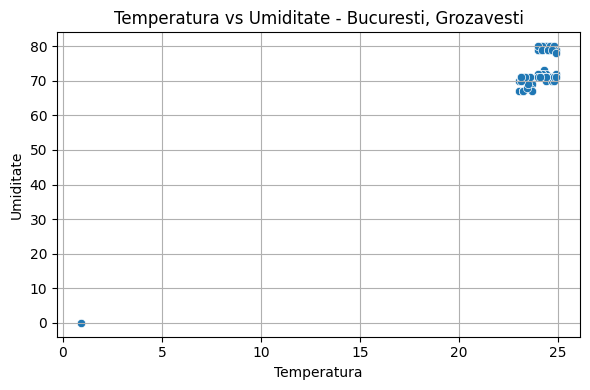


Scatter plots pentru locatia: Bucuresti, Politehnica ACS


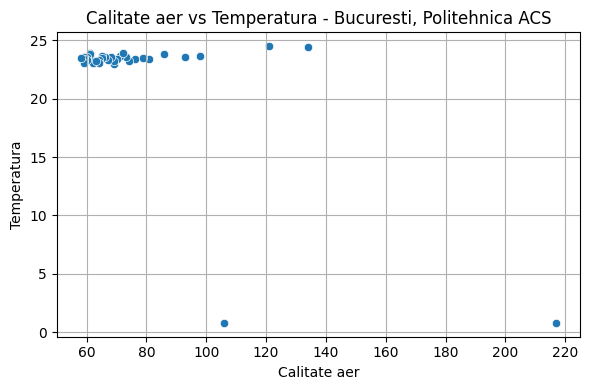

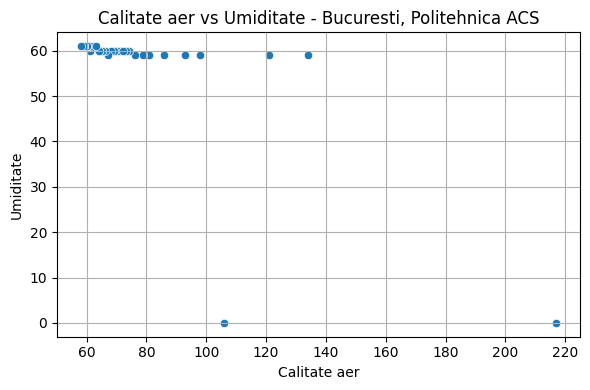

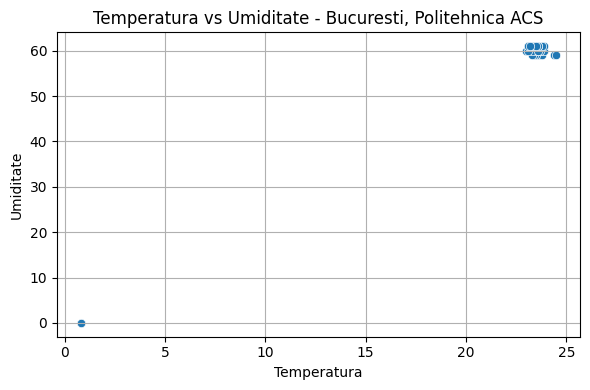

In [23]:
# Lista locatiilor si variabilele numerice
locatii = df_nou["Locatie"].unique()
num_cols = ["Calitate aer", "Temperatura", "Umiditate"]

# Genereaza toate combinatiile de cate 2 variabile numerice
perechi = list(combinations(num_cols, 2))

# Scatter plot pentru fiecare pereche si locatie
for locatie in locatii:
    subset = df_nou[df_nou["Locatie"] == locatie].dropna(subset=num_cols)

    if subset.shape[0] > 2:
        print(f"\nScatter plots pentru locatia: {locatie}")
        
        for x, y in perechi:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(data=subset, x=x, y=y)
            plt.title(f"{x} vs {y} - {locatie}")
            plt.xlabel(x)
            plt.ylabel(y)
            plt.grid(True)
            plt.tight_layout()
            plt.show()

Se pot formula mai multe observații în urma analizelor anterioare:

- Locația cu cel mai mare număr de înregistrări nu prezintă relații puternice între variabile, ceea ce poate reduce relevanța generalizărilor extrase doar pe baza acesteia.

- În cazul locației Pitești, relațiile dintre variabile par a fi aproape liniare, ceea ce este oarecum suspect în contextul observației anterioare, unde lipsa corelațiilor era dominantă.

- Pentru ultimele locații din set, relațiile între variabile par a fi aproape constante sau foarte slab variabile, ceea ce nu permite formularea unor reguli generale.

Prin urmare, în continuarea analizei este necesar să investigăm și influența variabilelor categorice, pentru a obține o imagine mai completă asupra comportamentului setului de date.

O analiză detaliată a acestor variabile pe fiecare locație în parte nu ar oferi concluzii solide, deoarece datele nu prezintă suficientă diversitate la nivel local, iar relațiile dintre variabile nu sunt suficient de consistente sau relevante pentru a susține o interpretare coerentă. Prin urmare, vom continua analiza pe întregul set de date, pentru a obține o imagine mai generală și stabilă.

/tmp/ipykernel_219/4072406408.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_nou, x=cat, y=num, estimator=np.mean, ci=None, ax=ax)
/tmp/ipykernel_219/4072406408.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_nou, x=cat, y=num, estimator=np.mean, ci=None, ax=ax)
/tmp/ipykernel_219/4072406408.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_nou, x=cat, y=num, estimator=np.mean, ci=None, ax=ax)
/tmp/ipykernel_219/4072406408.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_nou, x=cat, y=num, estimator=np.mean, ci=None, ax=ax)
/tmp/ipykernel_219/4072406408.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_nou, x=cat, y=num, estim

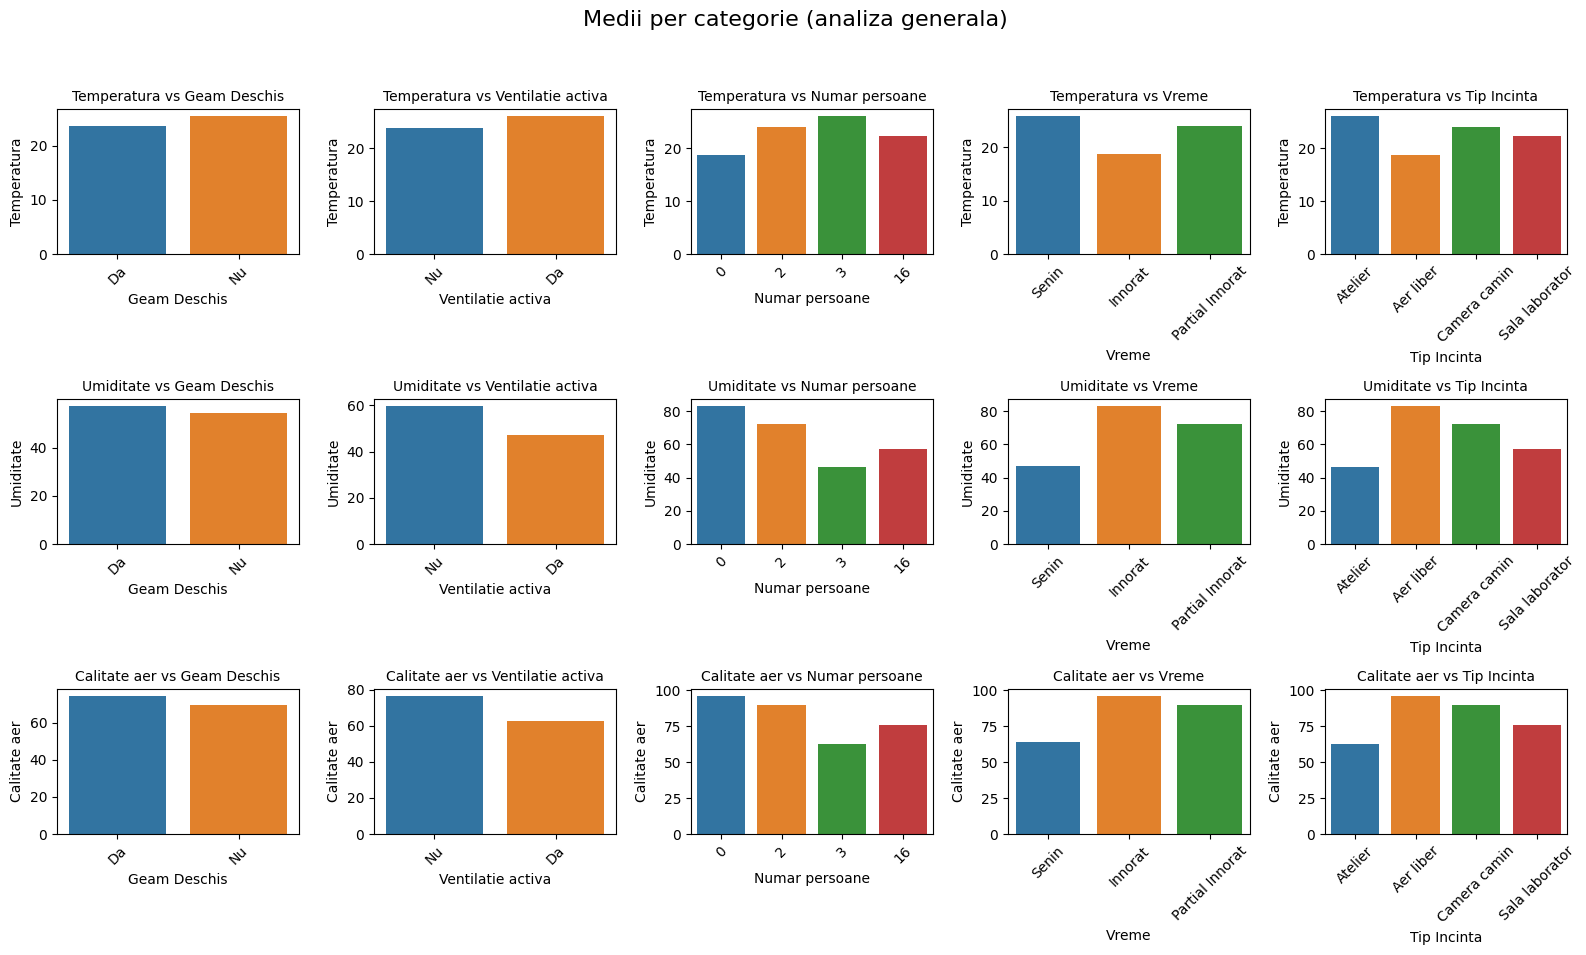

In [24]:
# Variabile categorice si numerice (fara Trafic)
categorice = ["Geam Deschis", "Ventilatie activa", "Numar persoane", "Vreme", "Tip Incinta"]
numerice = ["Temperatura", "Umiditate", "Calitate aer"]

# Cream o figura mare cu subplots: 3 randuri (numerice) x 5 coloane (categorice)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(16, 10))
fig.suptitle('Medii per categorie (analiza generala)', fontsize=16)

for i, num in enumerate(numerice):
    for j, cat in enumerate(categorice):
        ax = axes[i][j]
        sns.barplot(data=df_nou, x=cat, y=num, estimator=np.mean, ci=None, ax=ax)
        ax.set_title(f'{num} vs {cat}', fontsize=10)
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Următoarele concluzii pot fi formulate pe baza graficelor obținute:

- Geamul deschis determină o scădere a temperaturii (aspect previzibil), o creștere a umidității și o ușoară scădere a calității aerului. Această ultimă observație poate fi influențată de amplasarea locuinței (zone aglomerate vs. zone verzi).

- Ventilația activă pare să crească temperatura, să scadă umiditatea și să îmbunătățească calitatea aerului. Creșterea temperaturii ar putea fi cauzată de o ușoară eroare de măsurare a senzorului în prezența fluxului de aer.

- Numărul de persoane prezintă un comportament aparent parabolic în relație cu variabilele analizate, dar rezultatul nu este suficient de concludent. Sunt necesare experimente suplimentare pentru validarea acestei ipoteze.

- Vremea afectează în mod destul de evident cele 3 variabile, având efectul așteptat la fiecare.
- Tipul incintei exercită o influență semnificativă asupra calității aerului, manifestând un efect contrar intuiției în cazul acestei variabile, în timp ce pentru celelalte două, comportamentul observat rămâne mai predictibil și mai similar cu așteptările.Este important de menționat că acest rezultat poate fi influențat de o serie de factori ambientali suplimentari, care nu au fost incluși în cadrul acestui studiu de caz.

În următoarea etapă, ne vom concentra atenția asupra **evoluției variabilelor una în funcție de cealaltă**, cu scopul de a identifica eventuale tipare de comportament (pattern-uri) și relații funcționale între acestea. Această analiză va fi realizată și **în prezența variabilelor categorice** relevante, precum *Geam Deschis*, *Ventilație Activă*, *Număr de persoane*, *Vreme* și *Tip incinta*, pentru a înțelege în ce măsură aceste condiții influențează interdependența dintre variabilele numerice. Integrarea acestui nivel suplimentar de segmentare permite o interpretare mai nuanțată și aplicabilă în contexte reale.


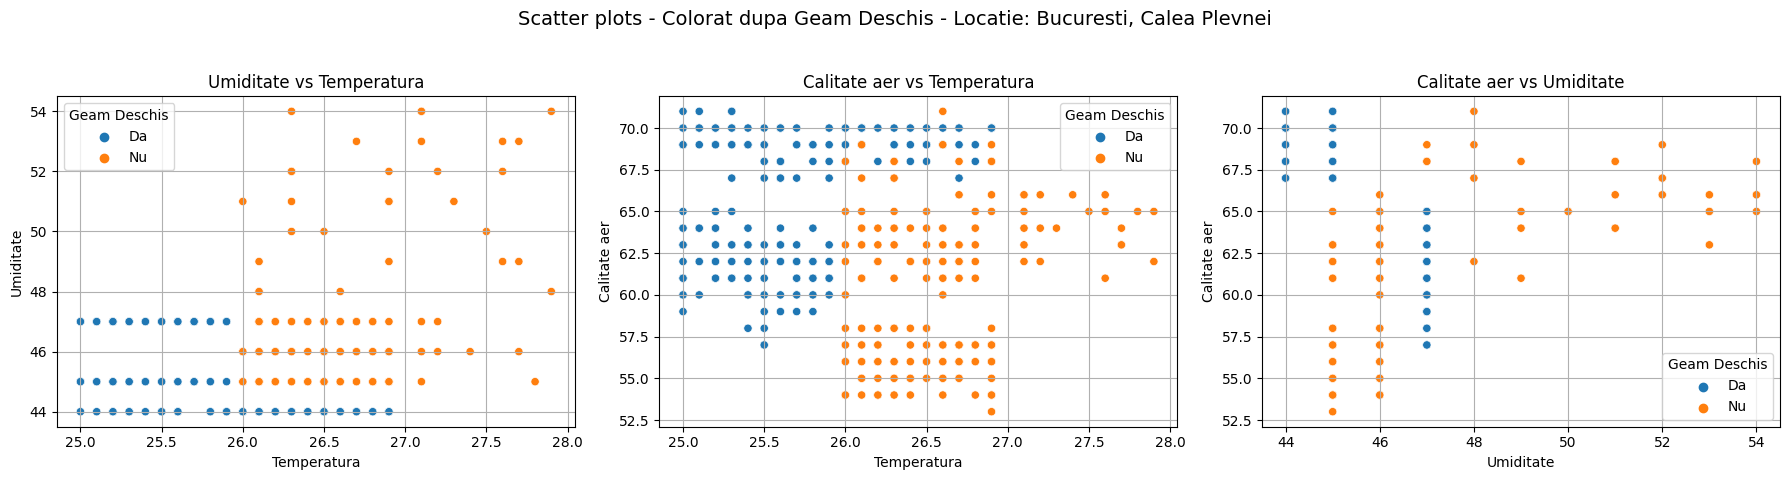

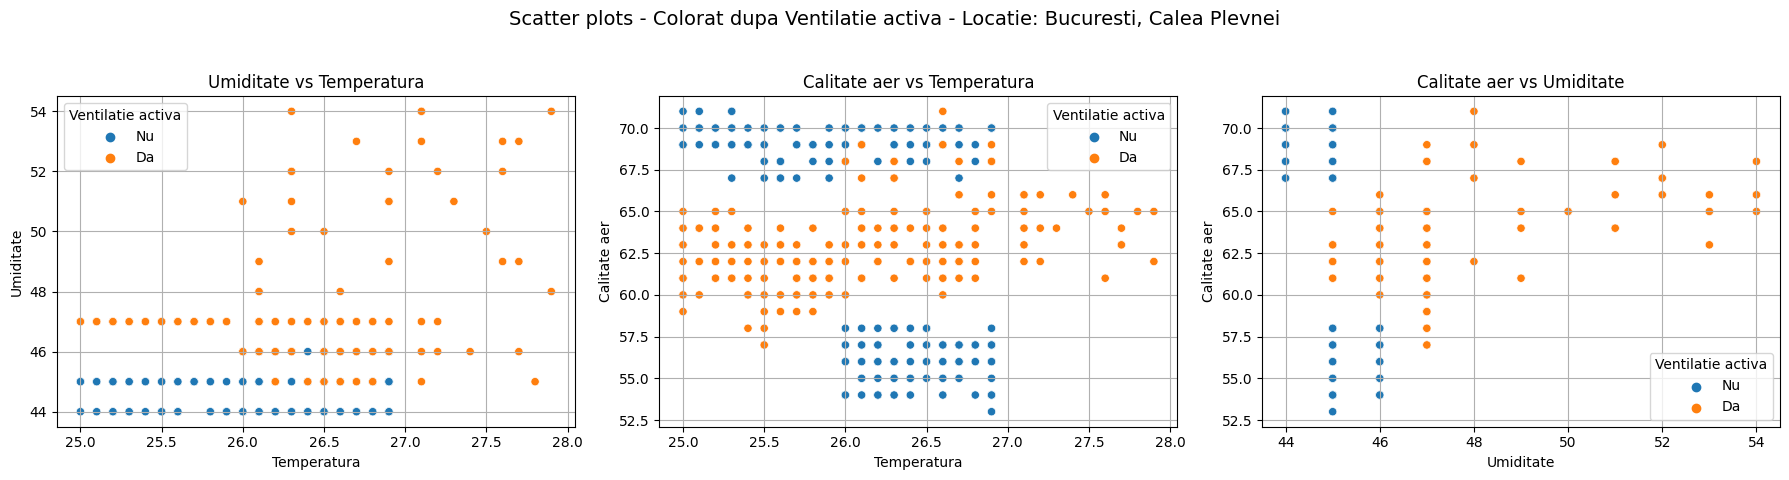

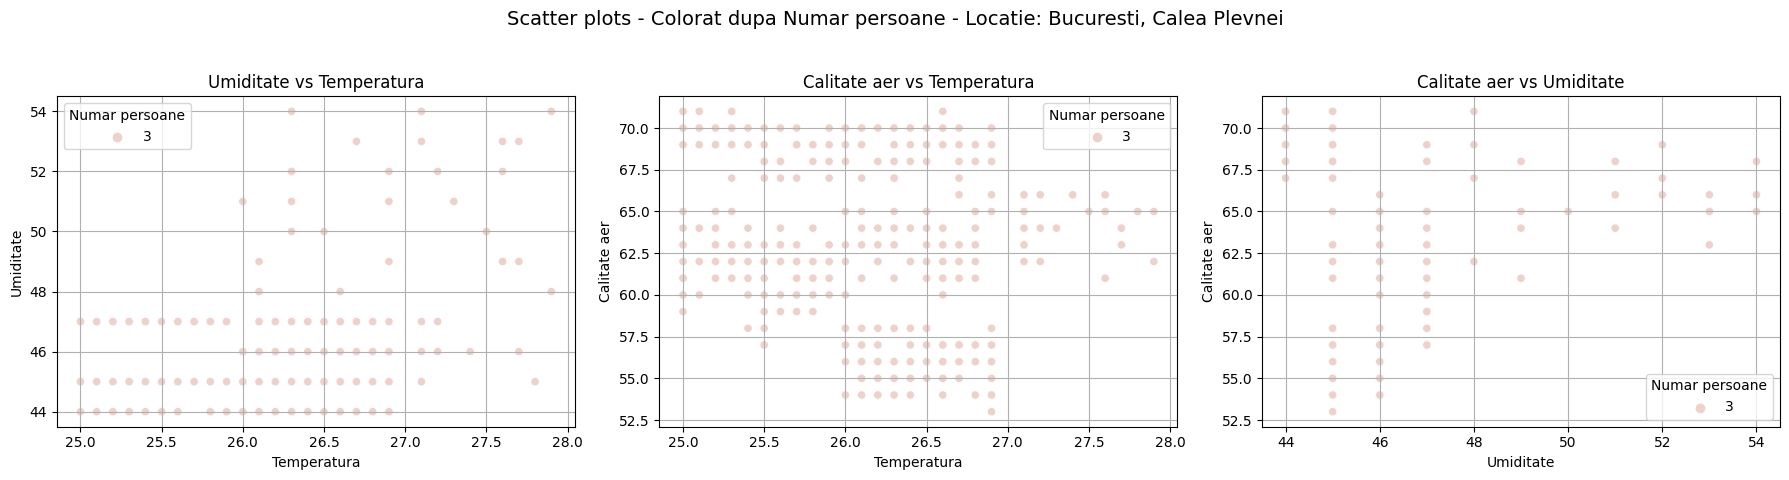

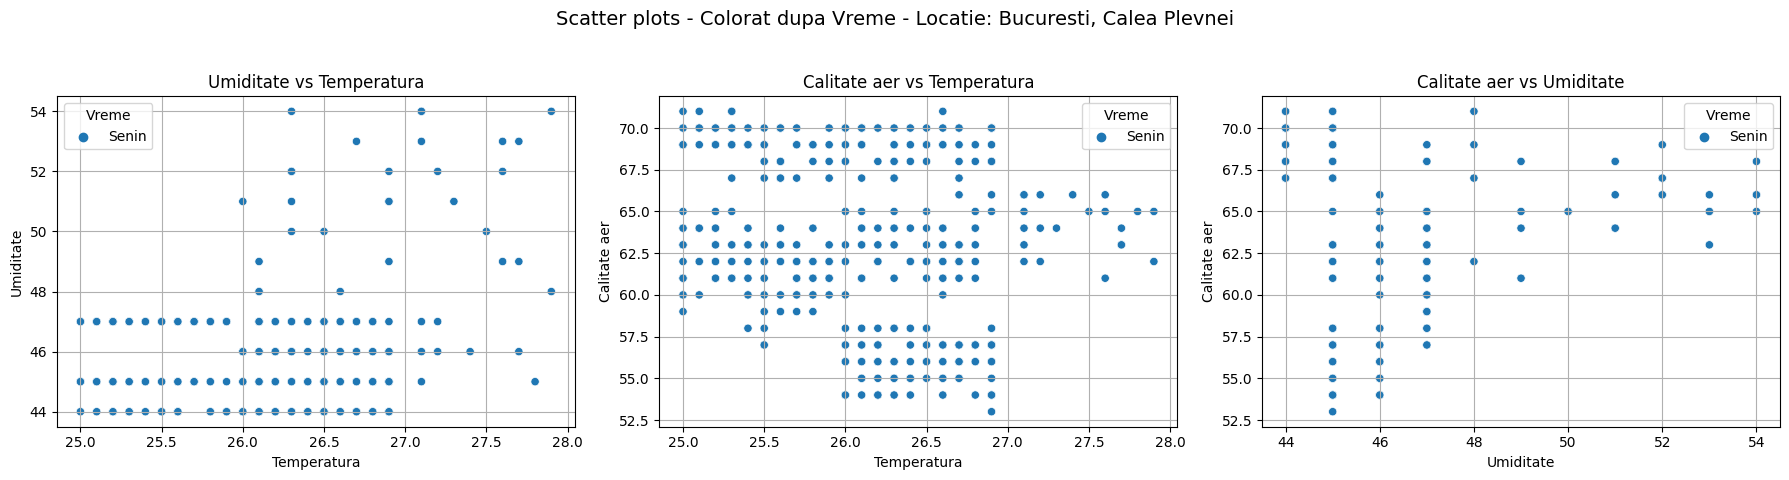

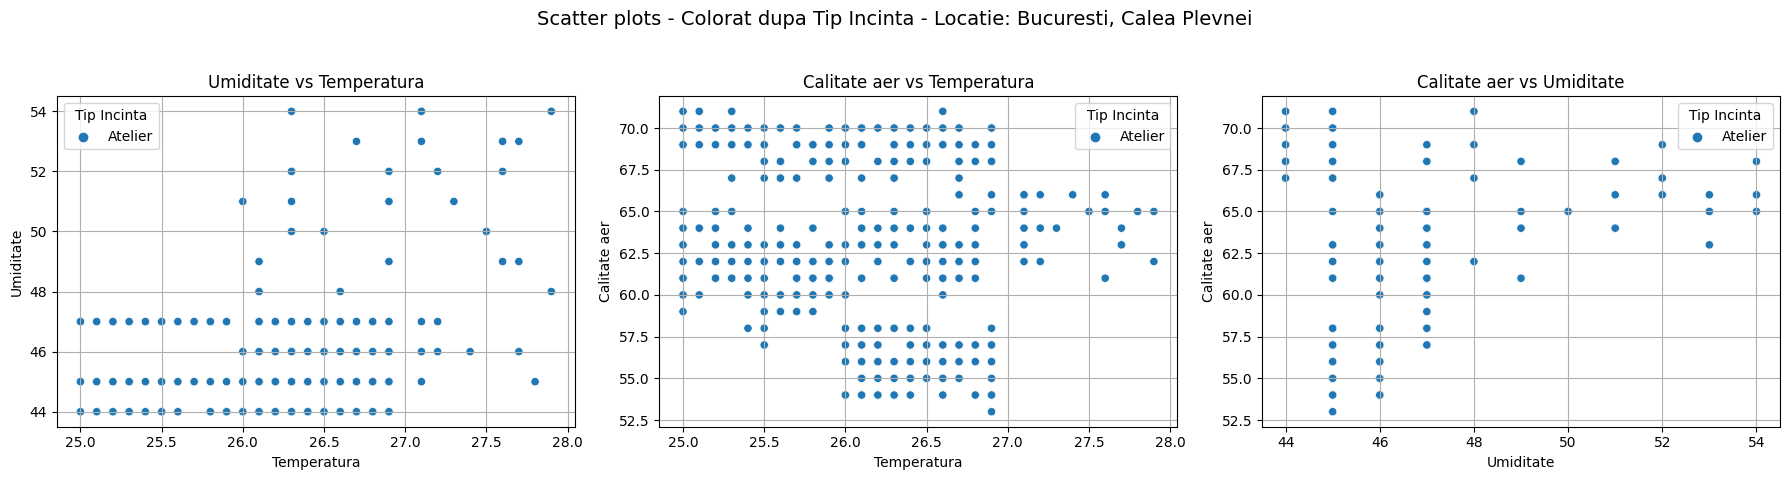

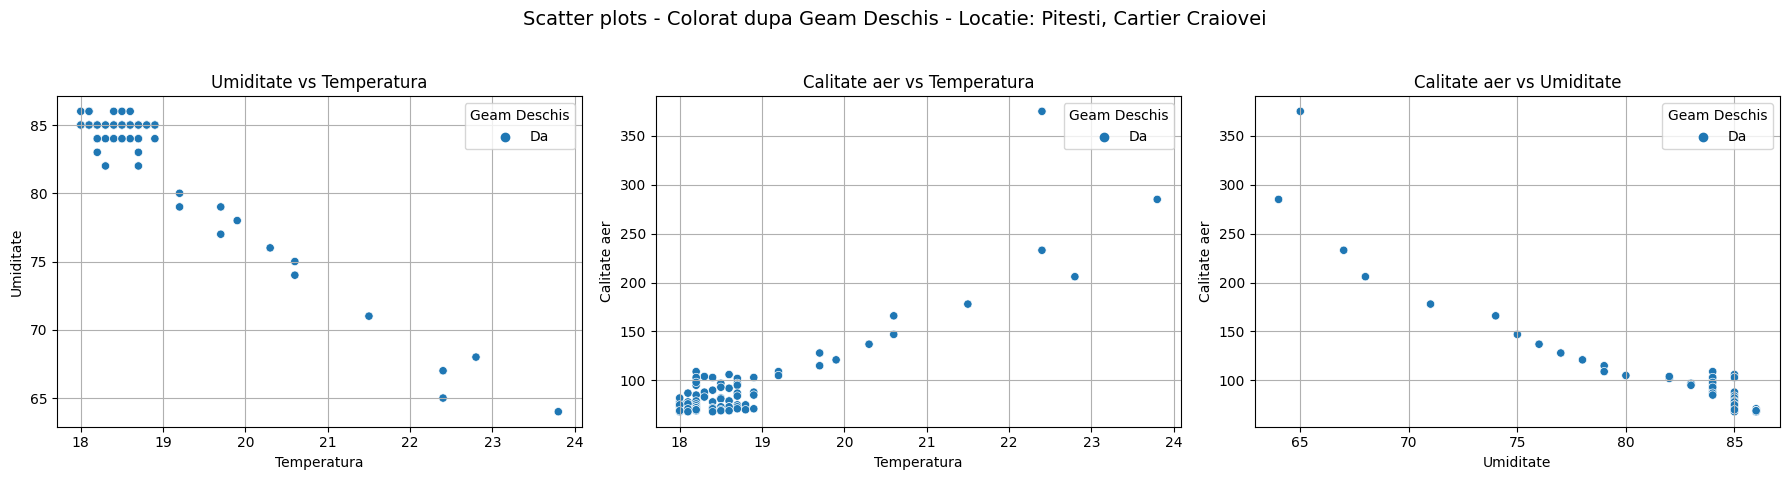

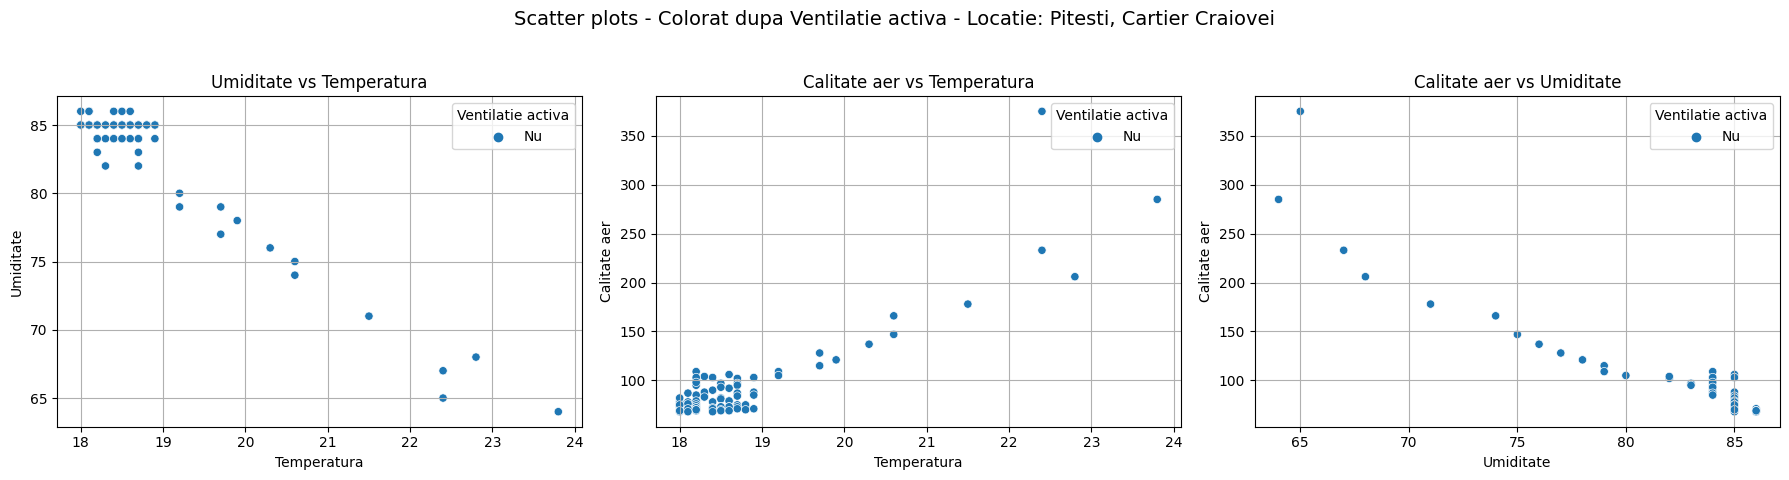

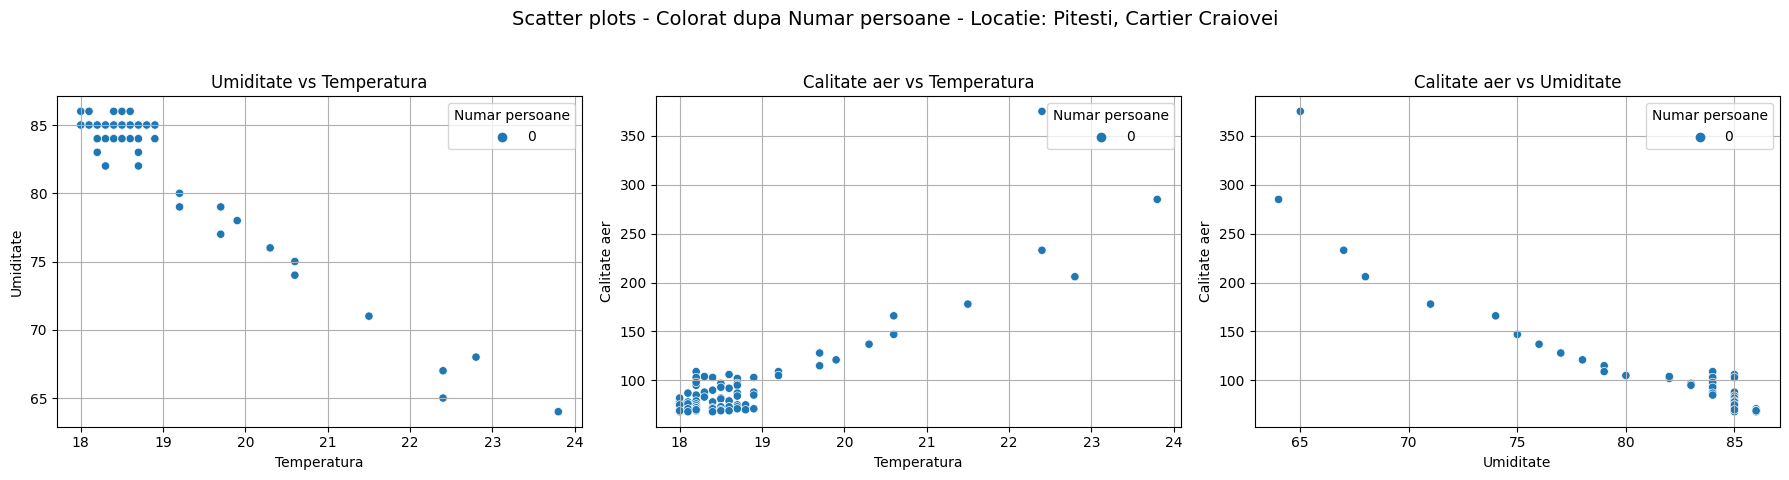

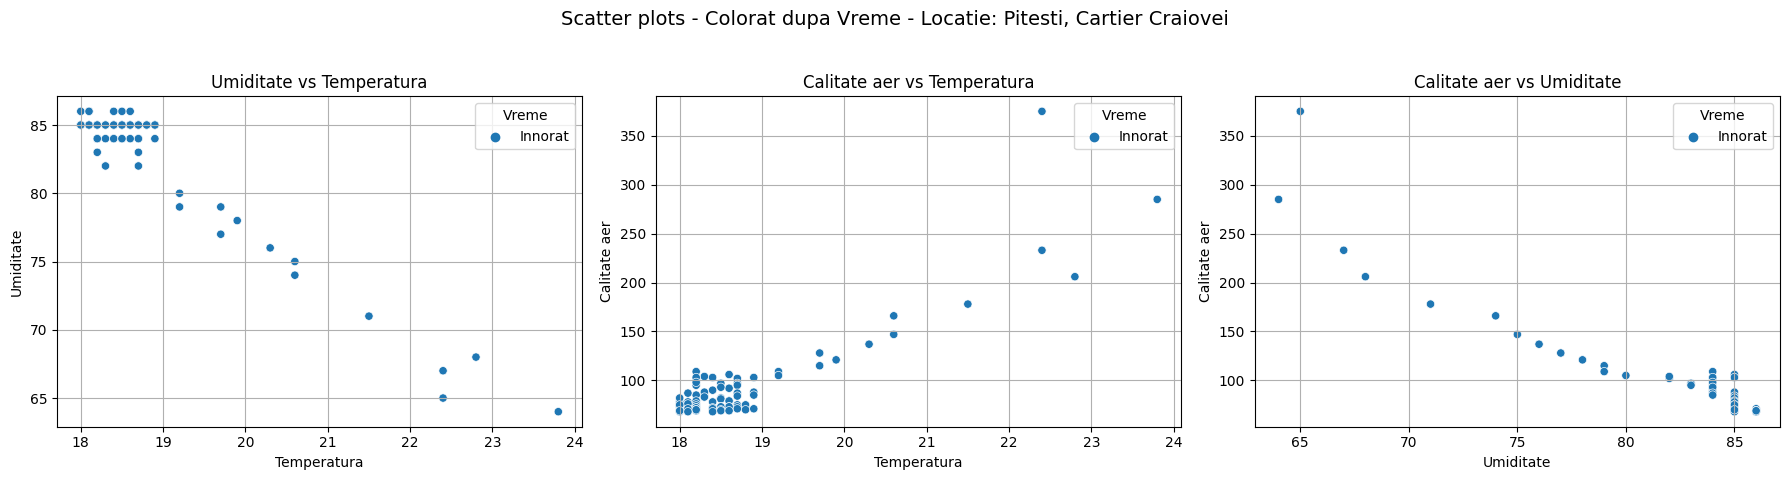

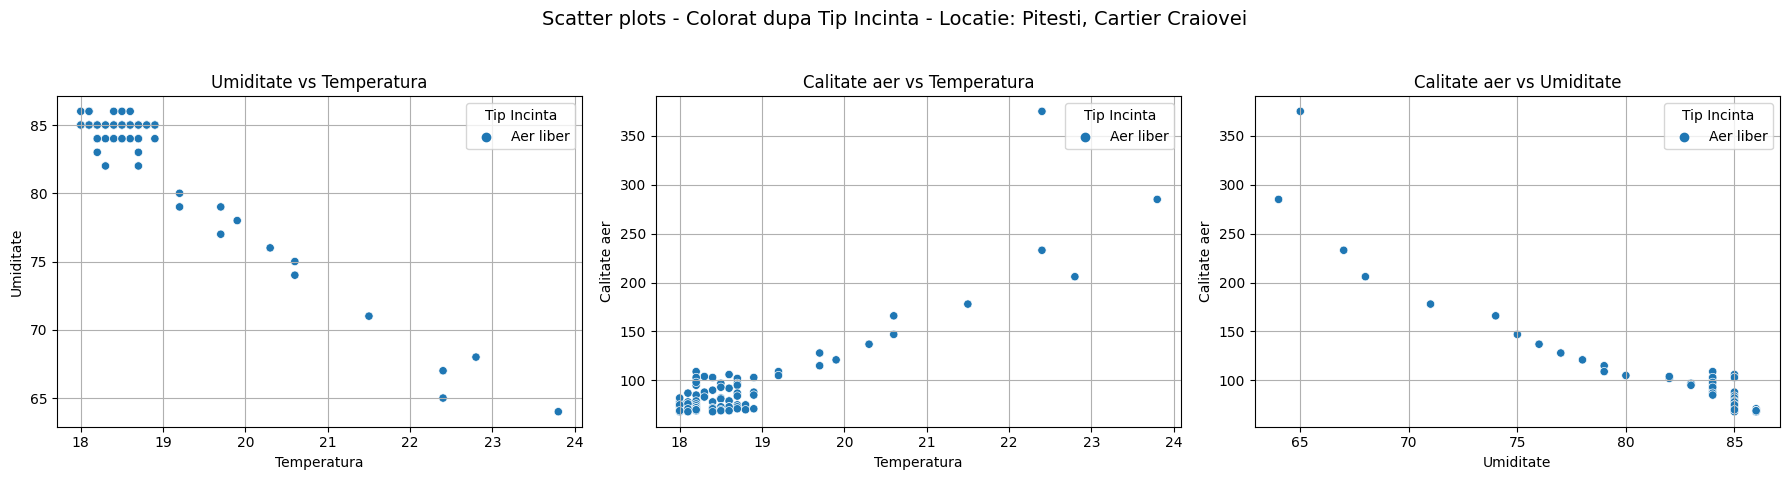

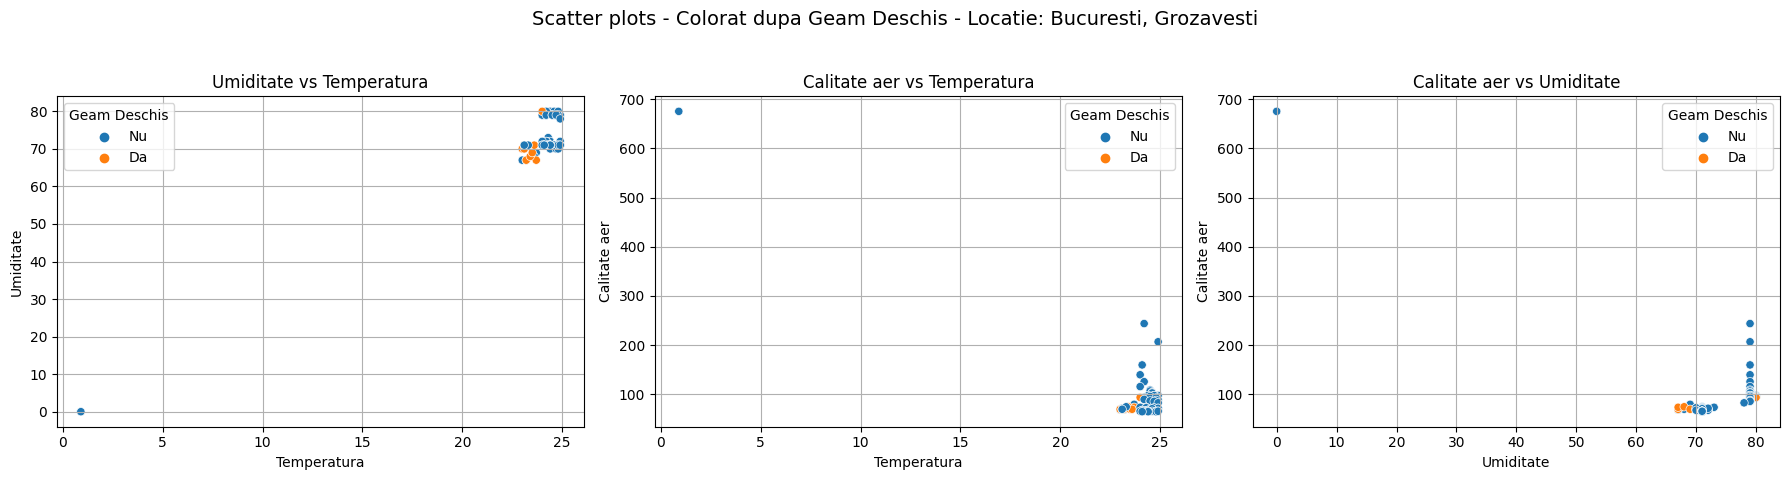

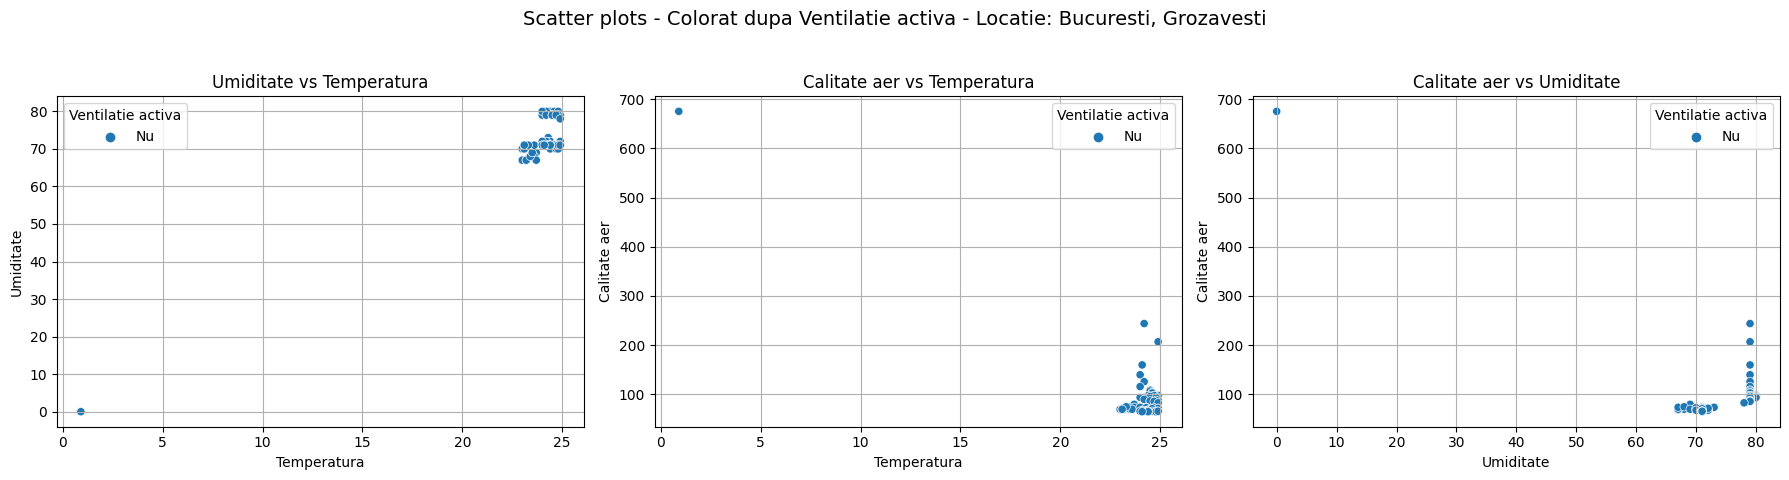

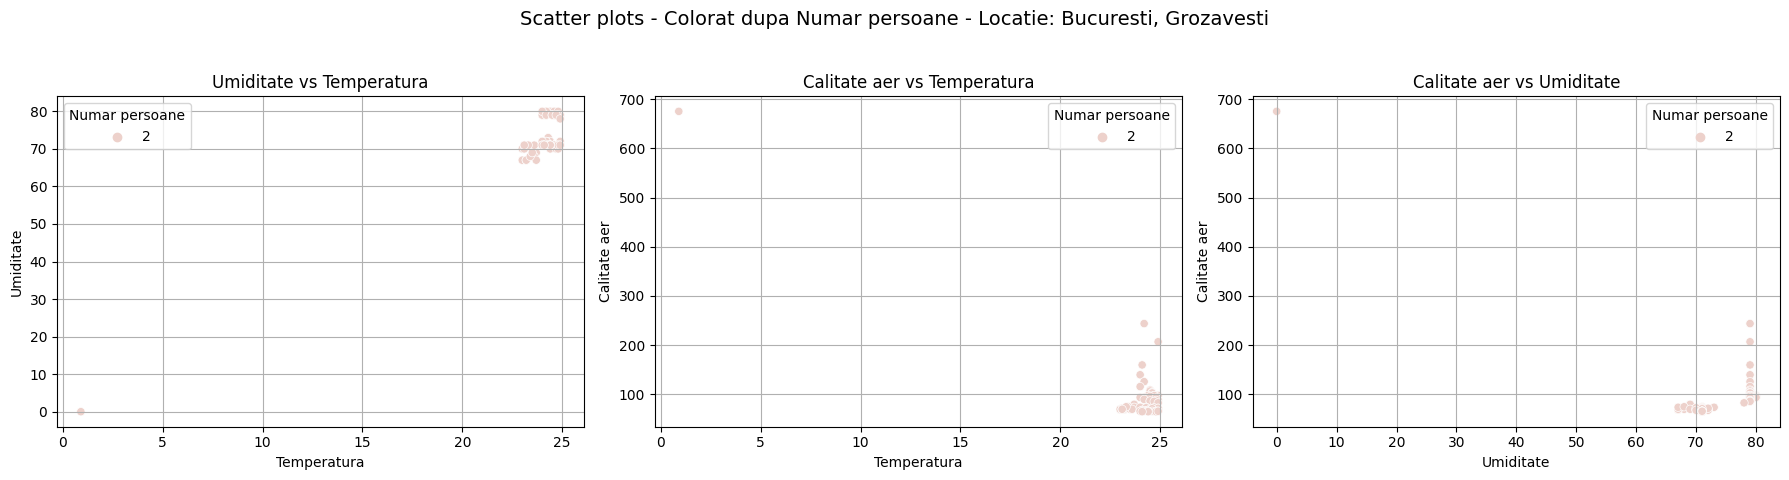

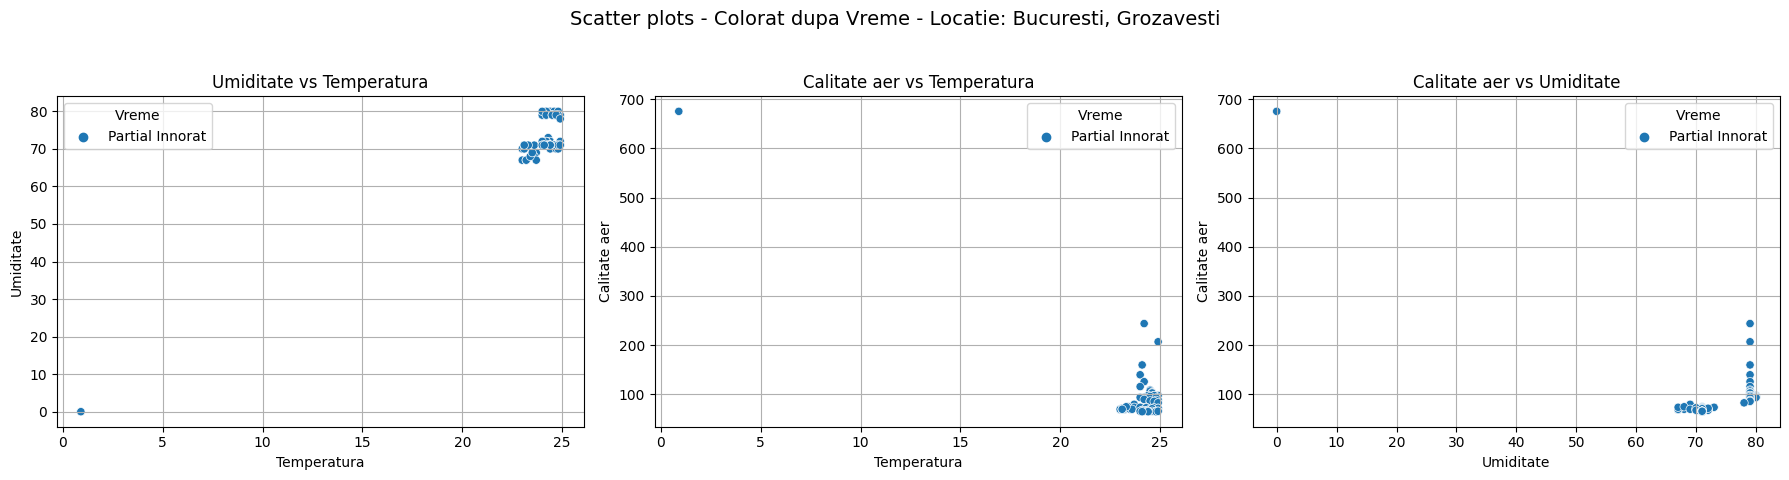

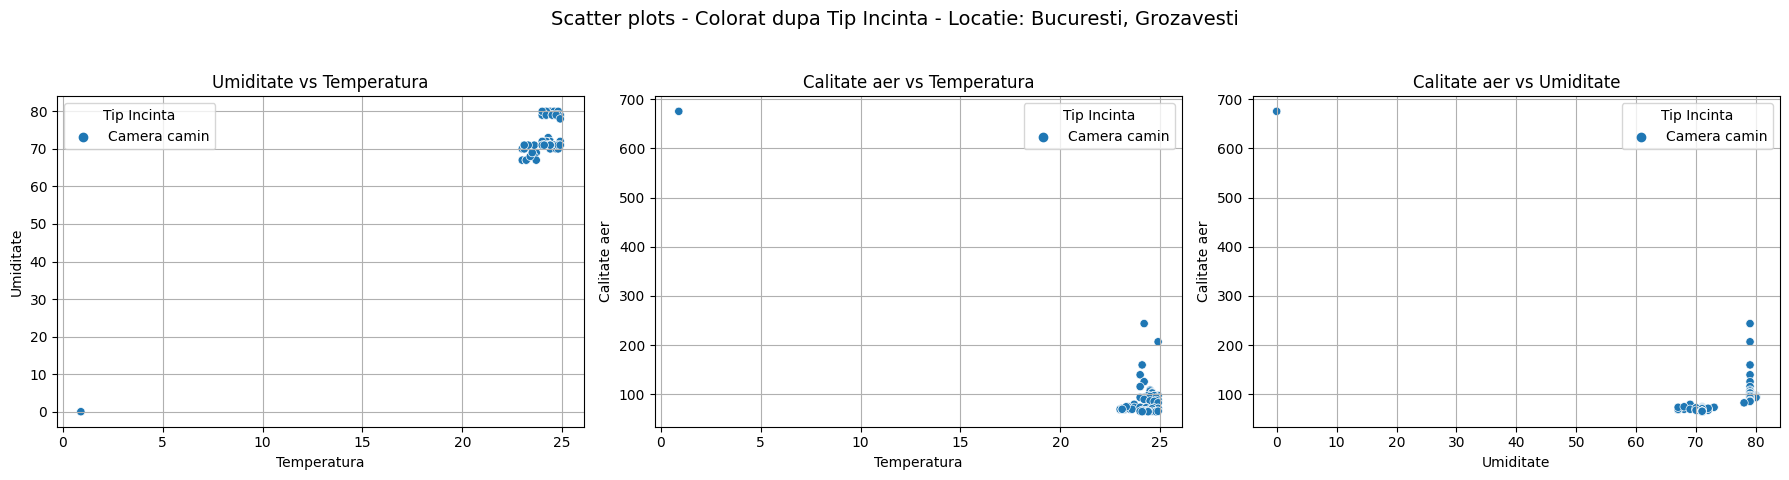

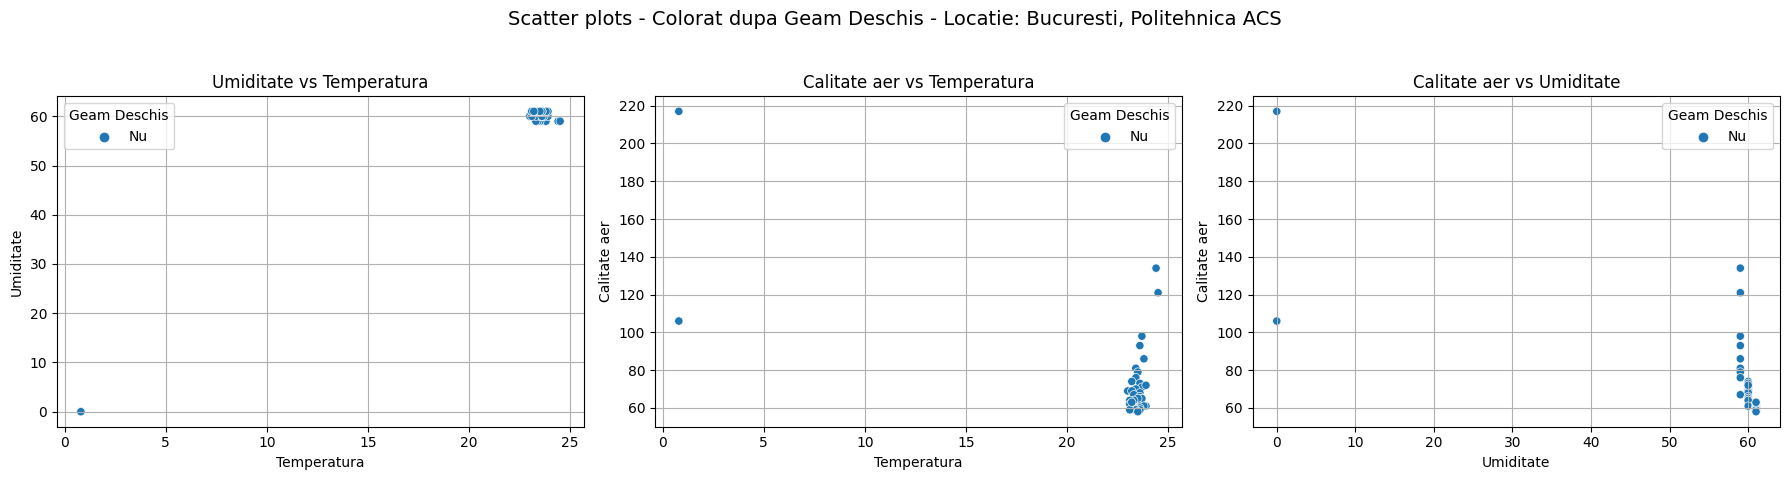

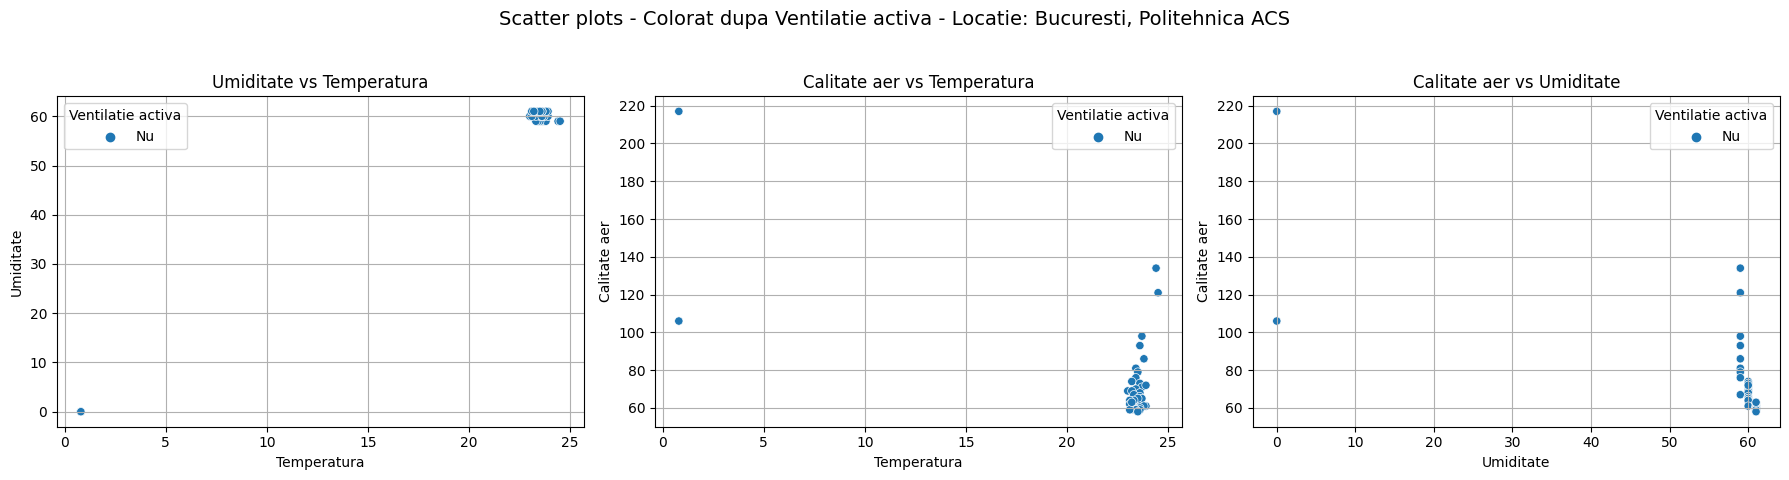

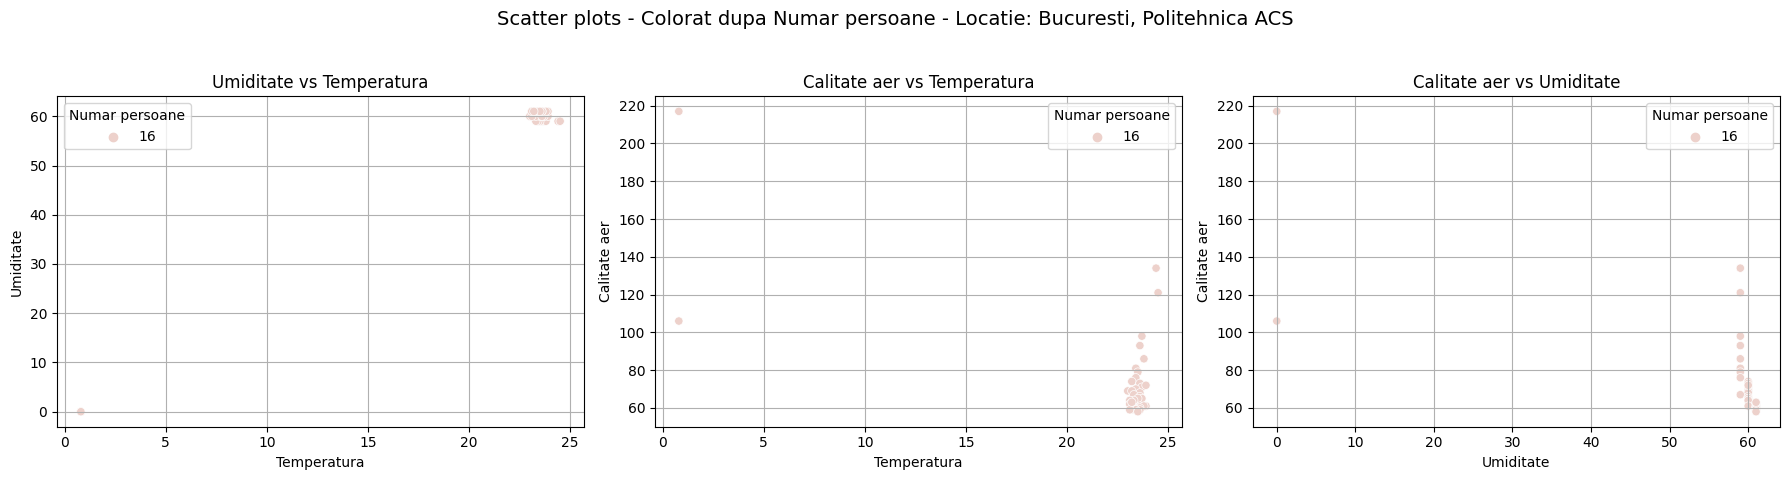

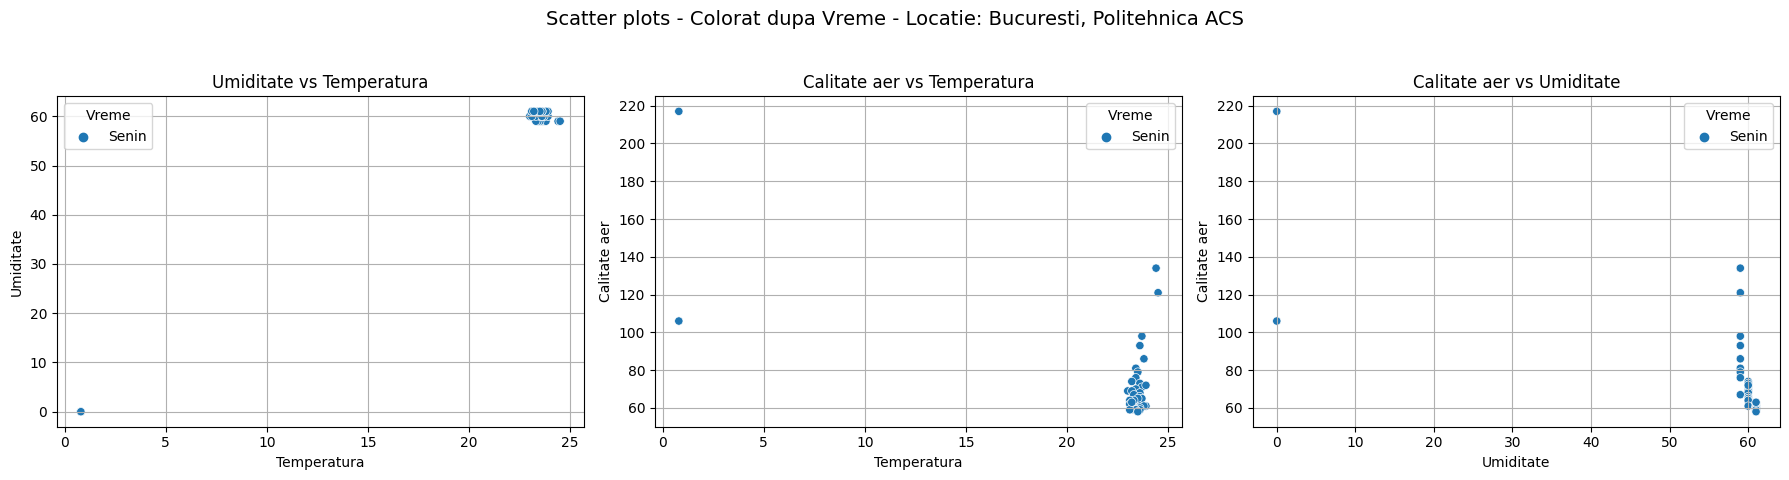

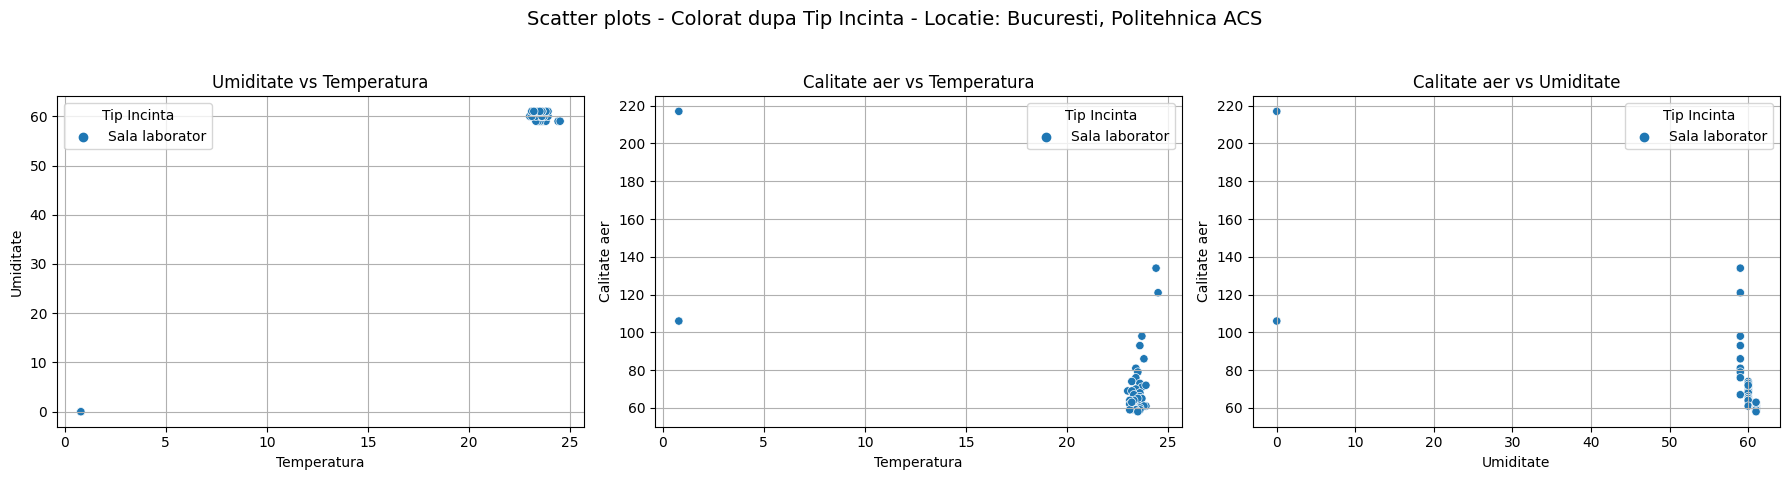

In [25]:
# Pentru fiecare locatie
# Variabile numerice și categorice (cu Vreme inclusa)
numerice = ["Temperatura", "Umiditate", "Calitate aer"]
categorice = ["Geam Deschis", "Ventilatie activa", "Numar persoane", "Vreme", "Tip Incinta"]
perechi = list(combinations(numerice, 2))
locatii = df_nou["Locatie"].unique()

# Scatter plots colorate dupa fiecare variabila categorica, pentru fiecare locatie
for locatie in locatii:
    subset = df_nou[df_nou["Locatie"] == locatie].dropna(subset=numerice)

    for cat in categorice:
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
        fig.suptitle(f"Scatter plots - Colorat dupa {cat} - Locatie: {locatie}", fontsize=14)

        for i, (x, y) in enumerate(perechi):
            sns.scatterplot(data=subset, x=x, y=y, hue=cat, ax=axes[i])
            axes[i].set_title(f"{y} vs {x}")
            axes[i].grid(True)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

Singura observație semnificativă care poate fi formulată în acest caz este că prezența geamului deschis și a ventilației active pare să influențeze pozitiv relațiile dintre cele trei variabile numerice, atunci când acestea sunt analizate câte două.

Astfel, revenim la perspectiva anterioară: este esențial să avem o imagine de ansamblu asupra dinamicii datelor, pentru a putea formula decizii mai pertinente și bine fundamentate.

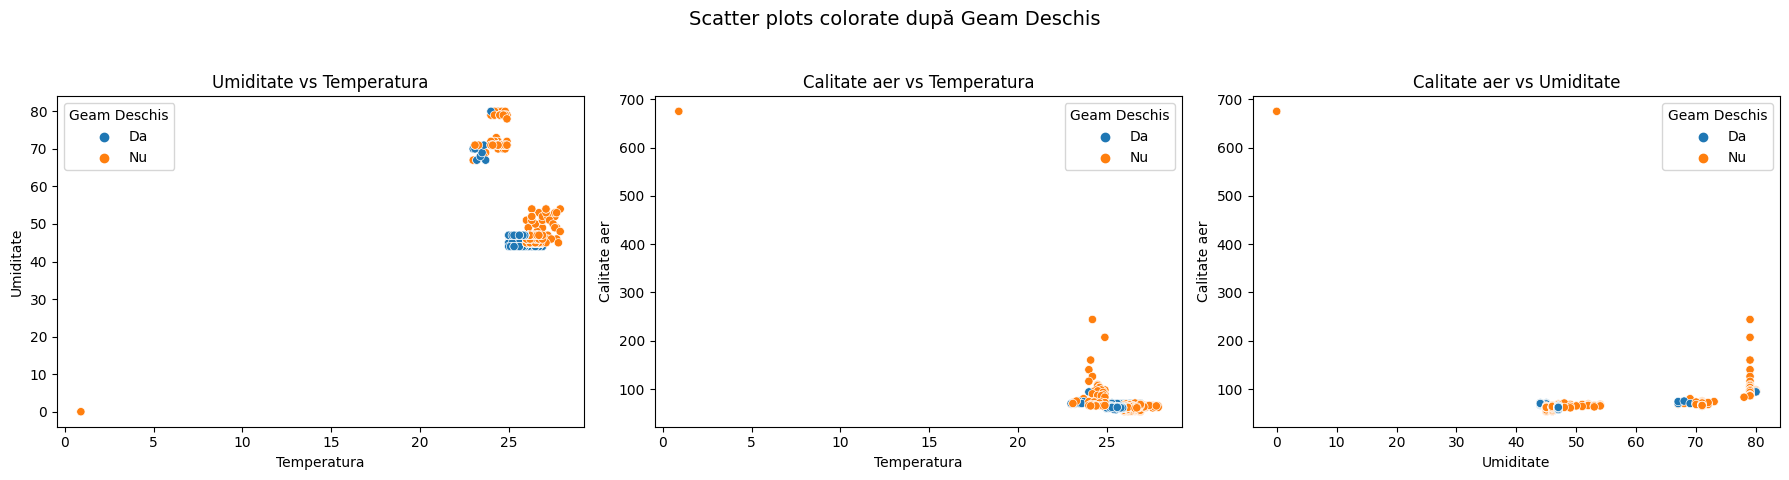

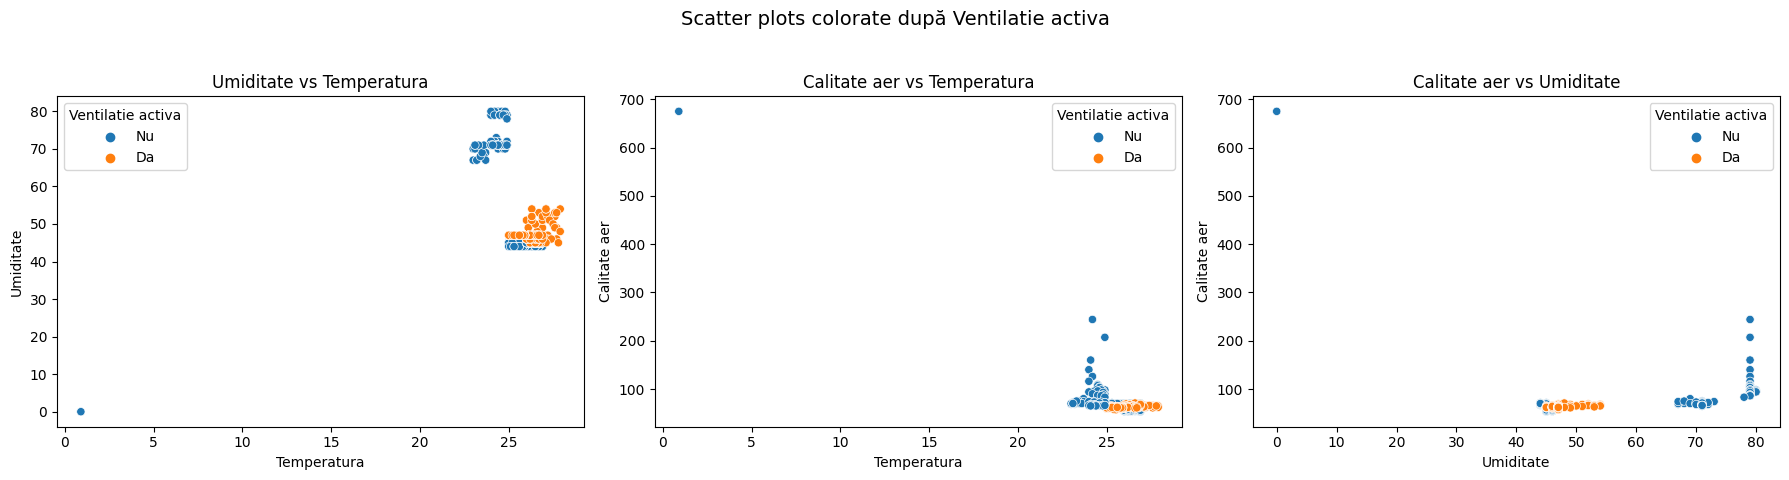

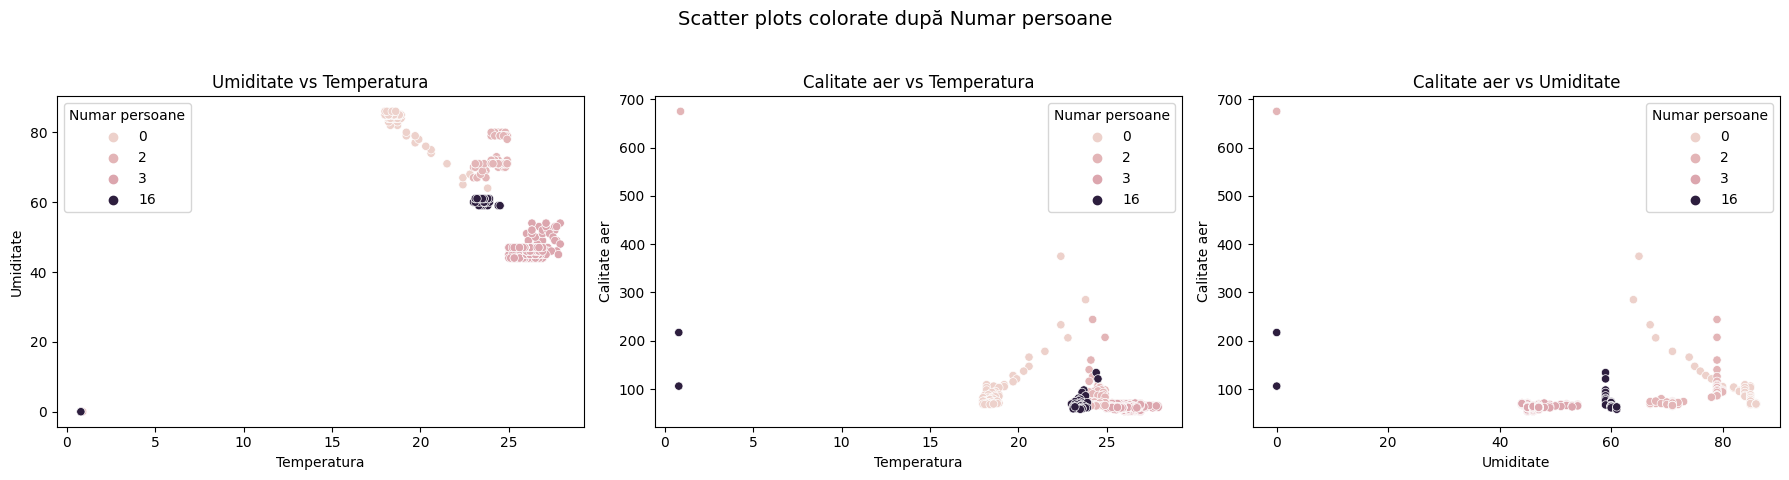

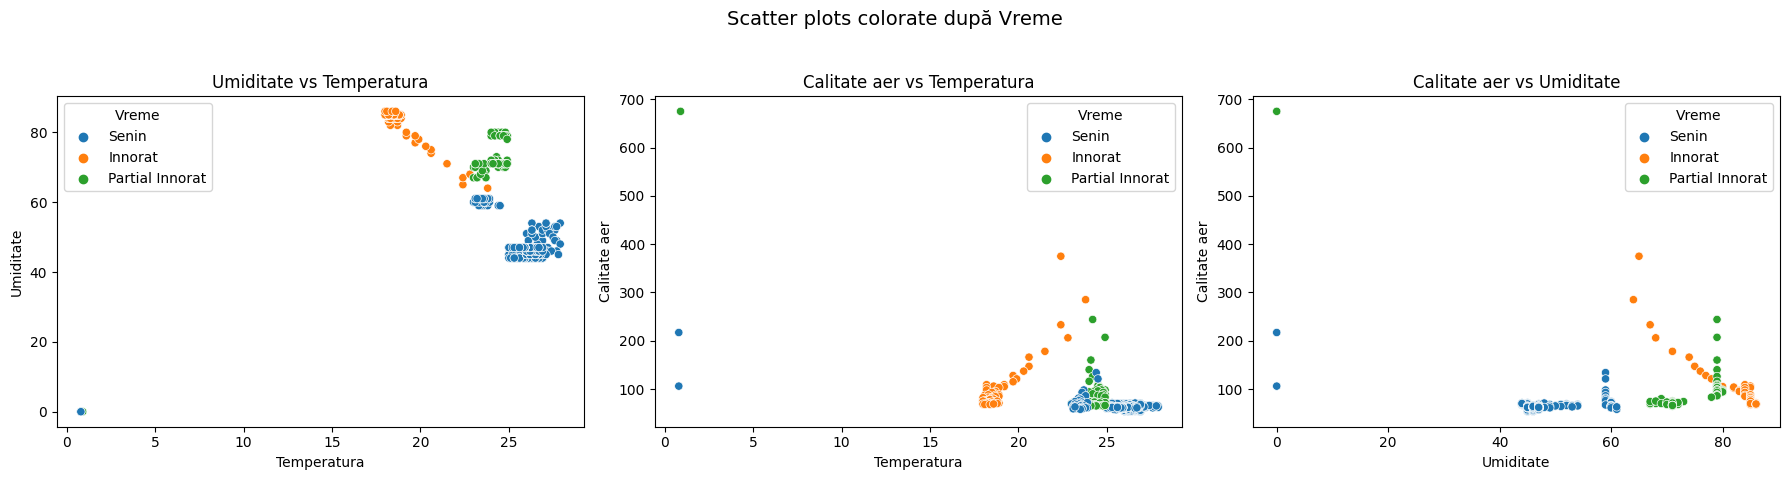

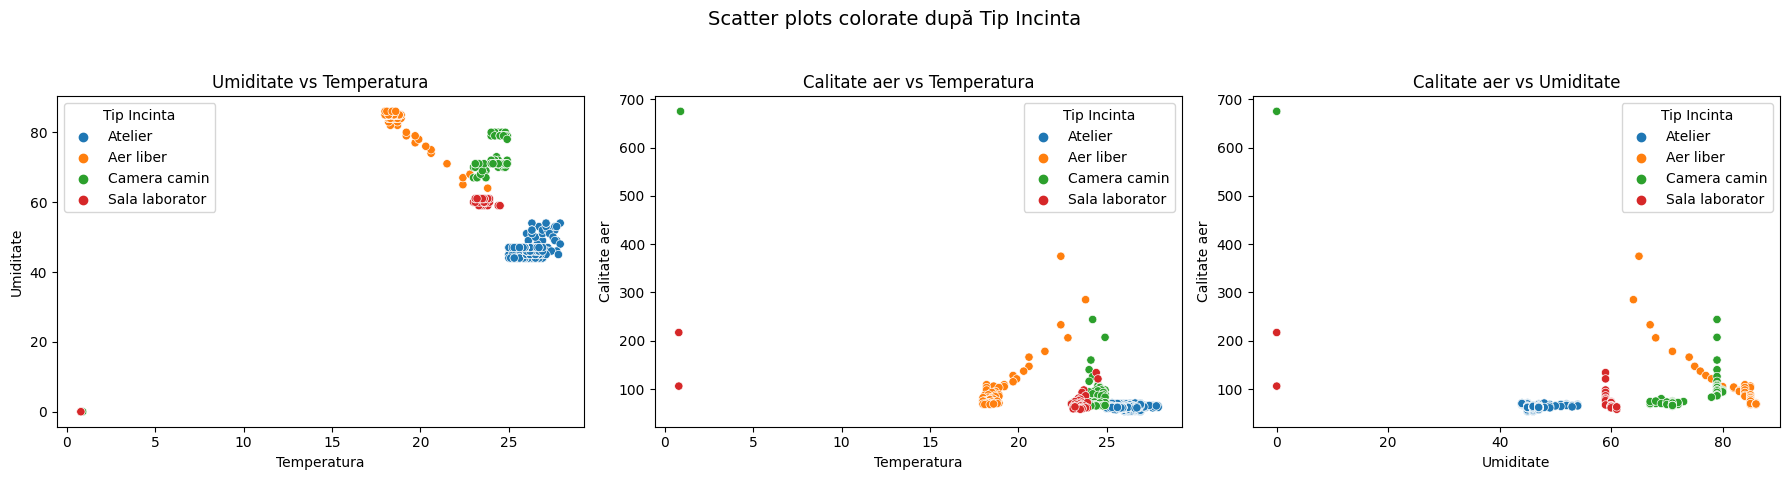

In [26]:
# Variabile categorice și numerice
categorice = ["Geam Deschis", "Ventilatie activa", "Numar persoane", "Vreme", "Tip Incinta"]
numerice = ["Temperatura", "Umiditate", "Calitate aer"]
perechi = list(combinations(numerice, 2))

# Afisare în matrice: 1 rand x 3 coloane pentru fiecare variabila categorica
for cat in categorice:
    # Filtrare speciala pentru "Geam Deschis" și "Ventilatie activa"
    if cat in ["Geam Deschis", "Ventilatie activa"]:
        df_plot = df_nou[df_nou["Tip Incinta"].isin(["Camera camin", "Atelier"])] # Influenta celor doua se poate vedea doar in incinte inchise
    else:
        df_plot = df_nou

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
    fig.suptitle(f'Scatter plots colorate după {cat}', fontsize=14)

    for i, (x, y) in enumerate(perechi):
        sns.scatterplot(data=df_plot, x=x, y=y, hue=cat, ax=axes[i])
        axes[i].set_title(f'{y} vs {x}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Acum că avem o imagine de ansamblu asupra relațiilor dintre variabile, putem formula următoarele observații:

- Geamul deschis pare să afecteze în mod negativ relația dintre umiditate și temperatură, în timp ce, în cazul celorlalte perechi de variabile, se menține un trend relativ constant, fără variații semnificative.

- Asupra primelor relații analizate se observă că influența ventilației active urmează un trend crescător, deși nu foarte semnificativ. În schimb, la fel ca în cazul geamului deschis, celelalte două relații se mențin relativ constante, însă cu o mai mare acuratețe și coerență a datelor, aspect specific condițiilor interioare controlate.

- Numărul de persoane nu influențează semnificativ relațiile dintre variabile, ceea ce indică faptul că înregistrările nu sunt afectate direct de prezența ocupanților (sau că diferențele sunt prea mici pentru a produce efecte evidente).

- Vremea are un impact clar și consistent asupra relațiilor dintre variabile:

 1) În condiții senine, relația dintre umiditate și temperatură este mai clar delimitată și liniară: pe măsură ce temperatura crește, umiditatea scade, indicând o relație inversă stabilă.

 2) Relația dintre temperatură și calitatea aerului este, de asemenea, mai bine conturată în zilele senine, sugerând că variațiile de temperatură pot fi corelate mai predictibil cu modificări în calitatea aerului.

 3) În schimb, în condiții înnorate sau parțial înnorate, relațiile dintre variabile devin mai dispersate și neregulate:
    - Calitatea aerului nu mai scade sau crește uniform în raport cu temperatura sau umiditatea.
    - Punctele sunt răspândite și nu mai urmează o tendință clară, ceea ce indică o slăbire a corelațiilor și o creștere a variabilității relațiilor dintre perechi de variabile.
- Astfel, vremea acționează ca un factor perturbator al relațiilor dintre variabile, nu doar ca influență directă asupra valorilor individuale.
- De asemenea, tipul incintei prezintă o influență comparabilă cu cea a condițiilor meteo, fapt explicabil prin lipsa de diversitate a datelor asociate ambelor variabile. Acestea par să evolueze aproape într-o relație bijectivă, în care condiția de vreme senină este practic inexistentă. Totuși, se remarcă faptul că sala de laborator indică o evoluție pozitivă a calității aerului în raport cu temperatura, aspect care nu putea fi dedus clar doar pe baza variabilei ‘Vreme’. Acest comportament merită reținut și luat în considerare în cadrul unor studii viitoare.



Ca ultim pas în analiza noastră, ne propunem să investigăm evoluția în timp a principalelor variabile, în funcție de anumiți factori de context. Această etapă ne va ajuta să formulăm concluziile finale într-un mod cât mai bine fundamentat.

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

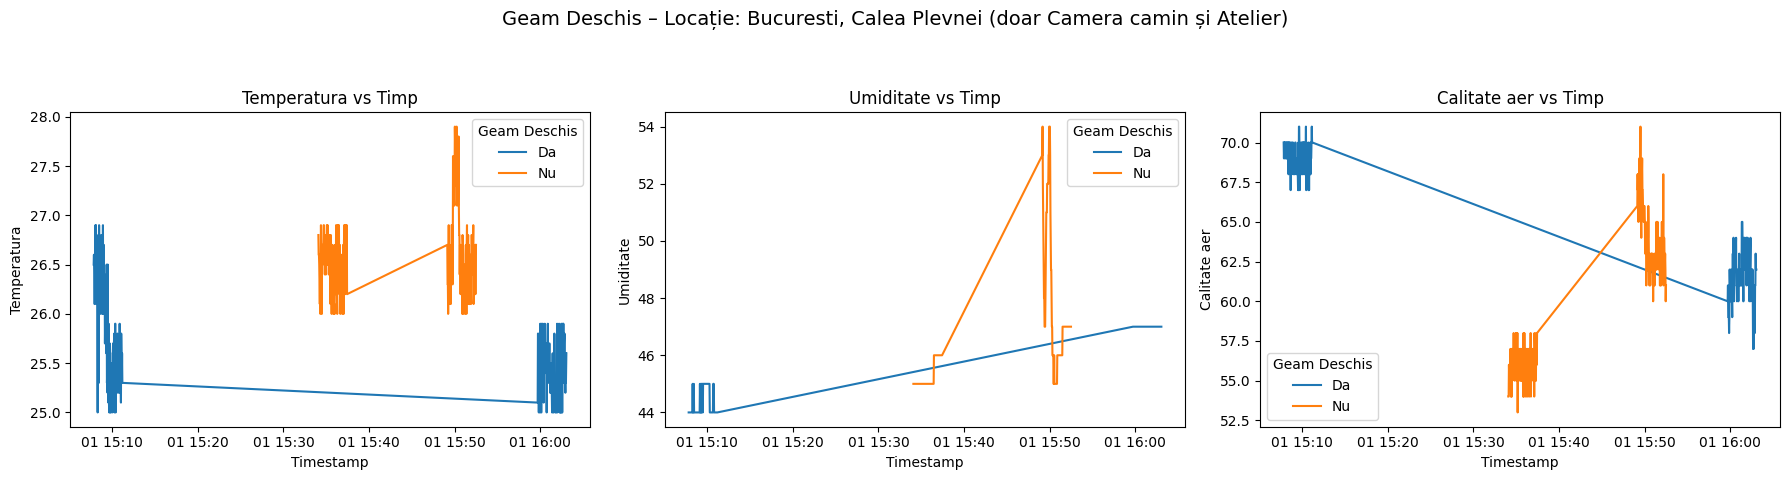

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

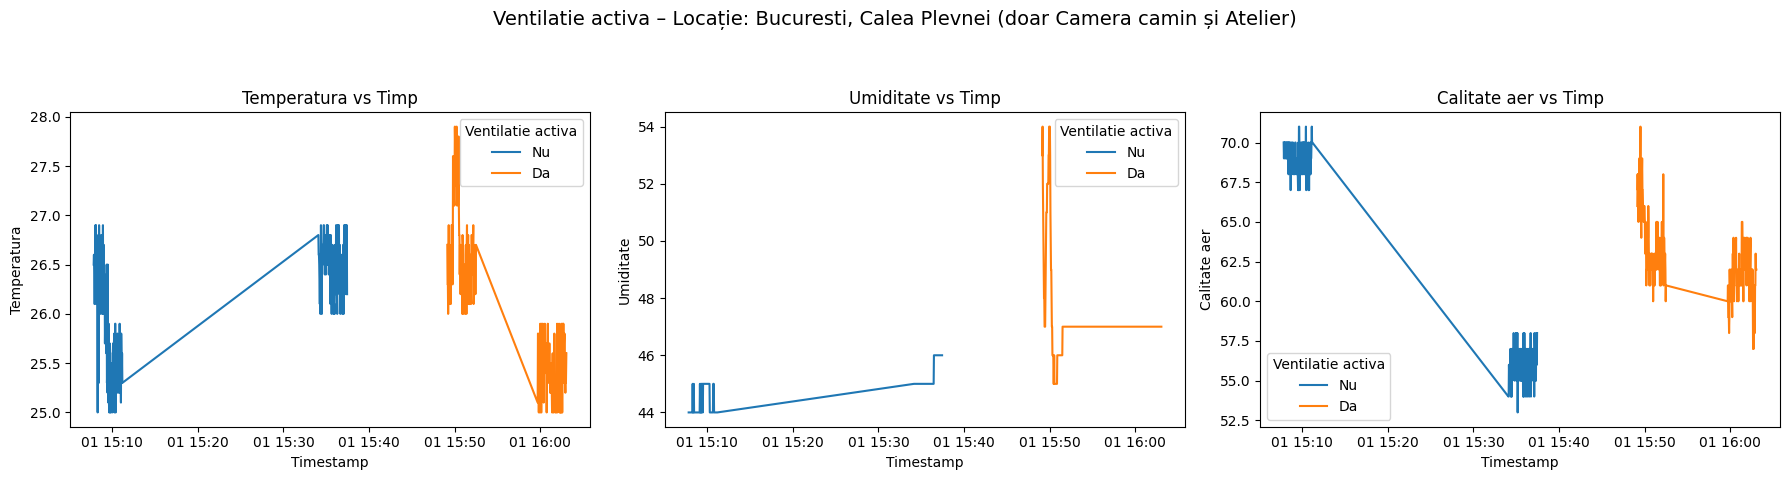

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

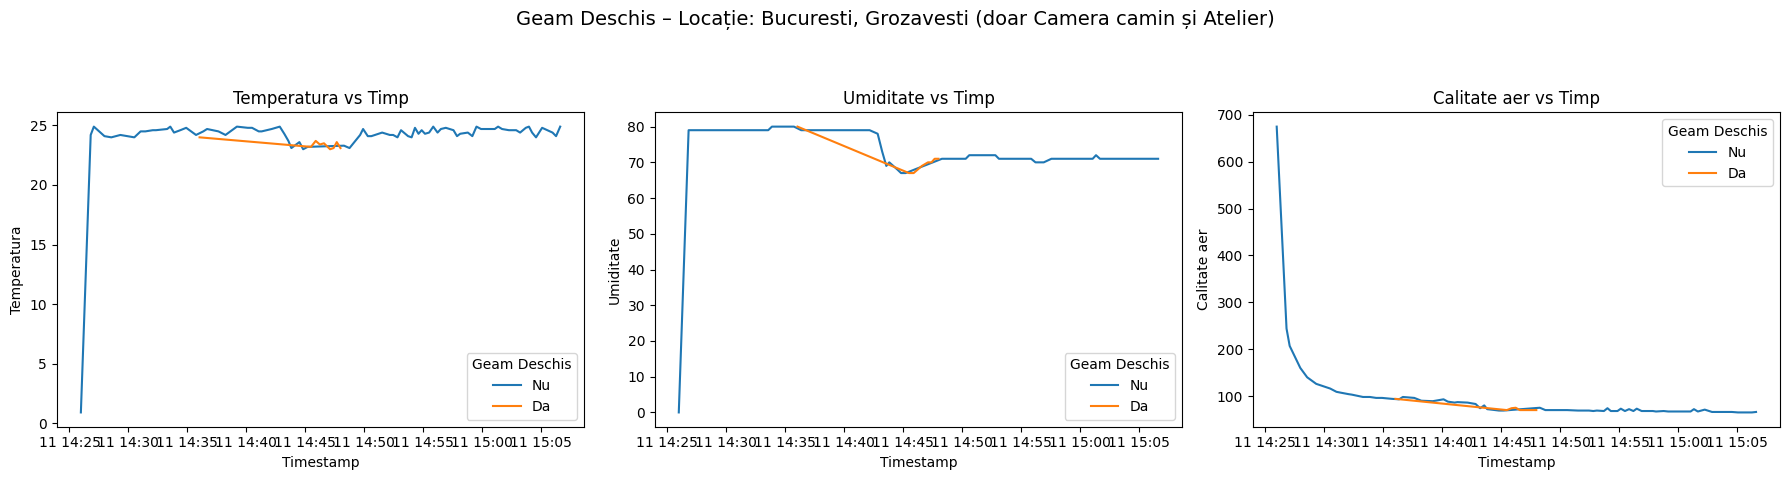

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

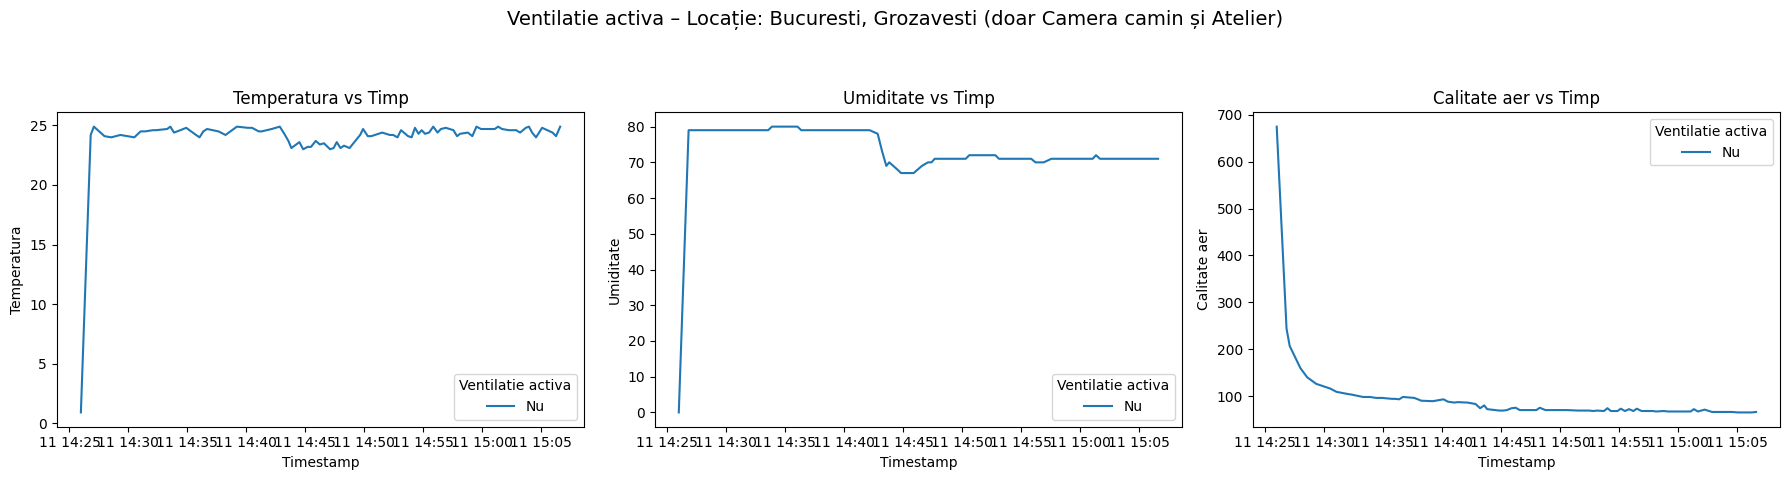

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

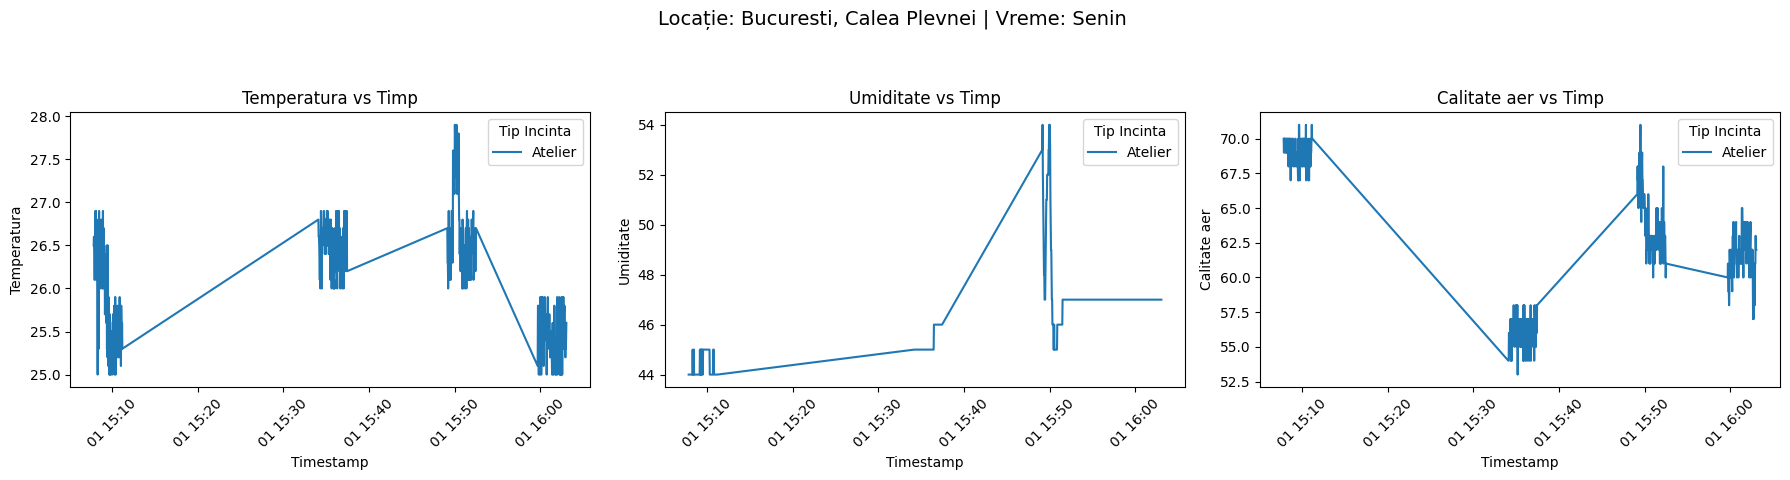

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

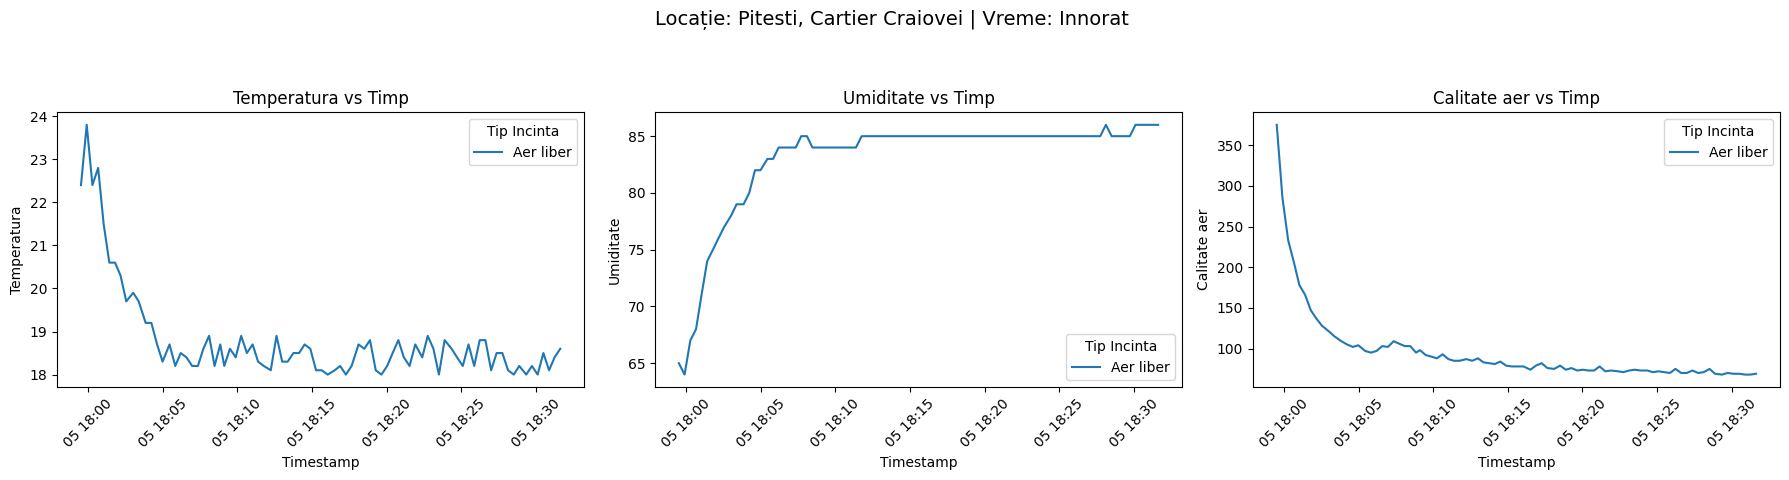

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

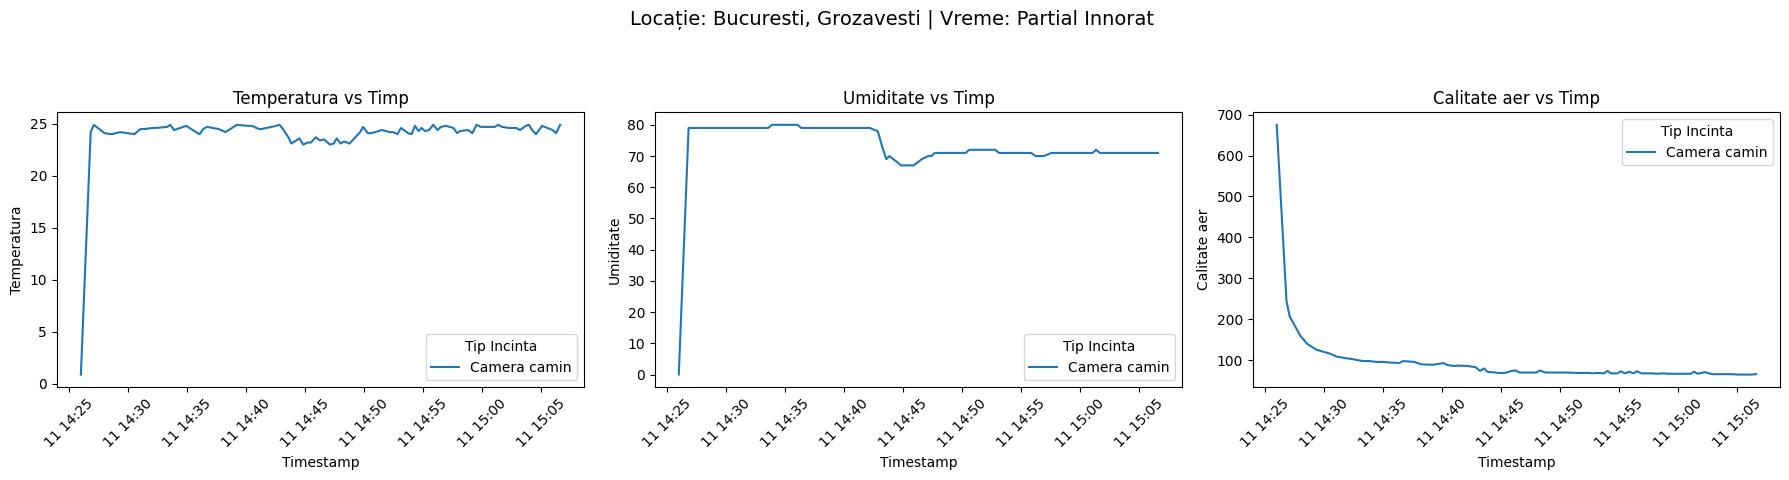

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

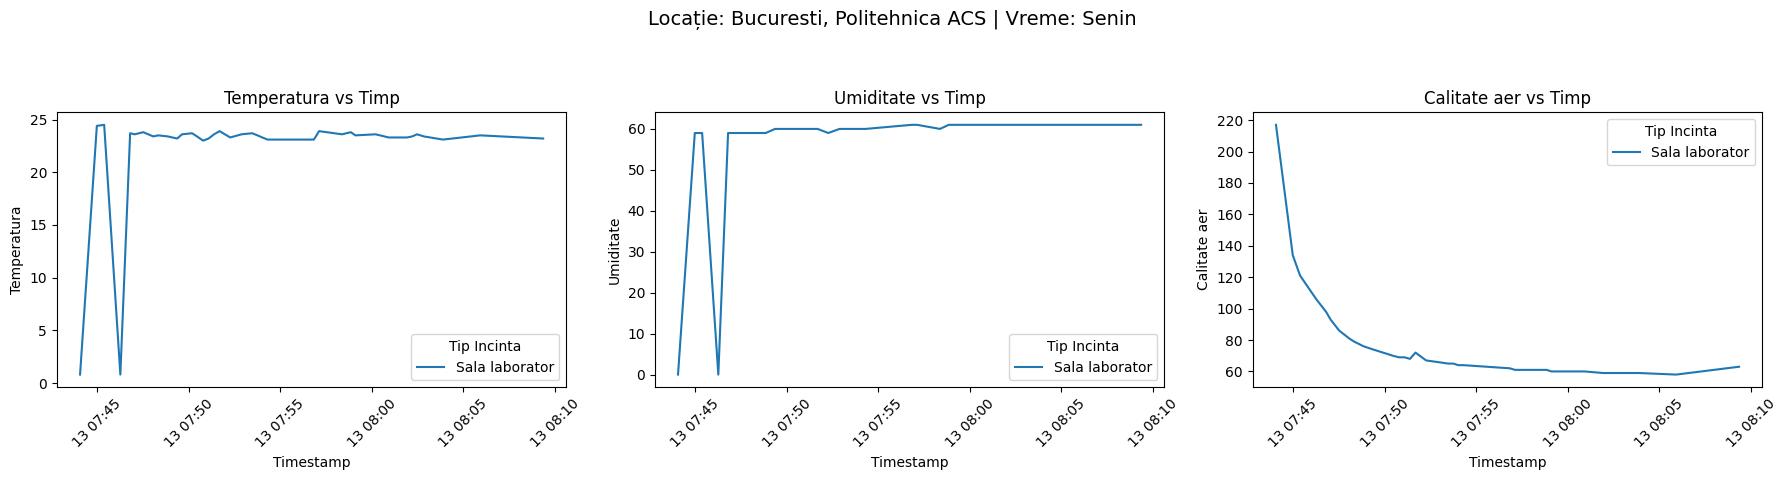

In [27]:
# Ne asiguram ca datele sunt sortate cronologic
df_nou_sorted = df_nou.sort_values(by="Timestamp").copy()

# Variabile numerice de analizat
variabile = ["Temperatura", "Umiditate", "Calitate aer"]

# === PARTEA 1 ===
# Geam Deschis si Ventilatie activa pentru incintele permise
categorice_filtrate = ["Geam Deschis", "Ventilatie activa"]
incinte_permise = ["Camera camin", "Atelier"]
locatii = df_nou_sorted["Locatie"].unique()

for locatie in locatii:
    for cat in categorice_filtrate:
        subset = df_nou_sorted[
            (df_nou_sorted["Locatie"] == locatie) &
            (df_nou_sorted["Tip Incinta"].isin(incinte_permise))
        ]
        if subset.empty:
            continue

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle(f"{cat} – Locație: {locatie} (doar Camera camin și Atelier)", fontsize=14)

        for i, var in enumerate(variabile):
            sns.lineplot(data=subset, x="Timestamp", y=var, hue=cat, ax=axes[i])
            axes[i].set_title(f"{var} vs Timp")

        plt.tight_layout(rect=[0, 0.03, 1, 0.92])
        plt.show()


# === PARTEA 2 ===

for locatie in locatii:
    subset = df_nou_sorted[df_nou_sorted["Locatie"] == locatie]
    if subset.empty:
        continue

    # Determinam vremea dominanta pentru acea locație
    vreme = subset["Vreme"].mode()[0] if not subset["Vreme"].mode().empty else "Necunoscută"

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"Locație: {locatie} | Vreme: {vreme} ", fontsize=14)

    for i, var in enumerate(variabile):
        sns.lineplot(data=subset, x="Timestamp", y=var, hue="Tip Incinta", ax=axes[i])
        axes[i].set_title(f"{var} vs Timp")
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.92])
    plt.show()

# Salvare set de date
df_nou.to_csv("Date_Dupa_Prelucrare.csv", index=False)

### Evaluarea evoluției în timp în funcție de „Geam Deschis”, „Vreme” și „Tipul de Incintă”
Pentru a înțelege mai bine dinamica variabilelor de interes – Temperatura, Umiditate și Calitate aer – am realizat o analiză a evoluției acestora în funcție de momentul zilei (Timpul). Această analiză a fost segmentată după trei variabile categorice: „Geam Deschis”, „Vreme” și „Tipul de Incintă”, considerate esențiale în contextul comportamentului mediului interior și exterior.

Includerea Tipului de Incintă în această analiză aduce o valoare suplimentară, întrucât permite distingerea clară între spațiile controlate (ex. Atelier, Cameră Cămin) și cele expuse (ex. Aer liber). Astfel, efectele deschiderii geamului sau ale variației vremii pot fi interpretate contextual, în funcție de caracteristicile mediului în care se manifestă.

Alegerea acestor variabile pentru segmentarea graficelor se bazează pe concluziile trase anterior, care indică faptul că „Geam Deschis”, „Vremea” și „Tipul de Incintă” influențează semnificativ relațiile dintre cele trei variabile monitorizate. Acestea determină variații semnificative ale valorilor în timp, afectând atât direcția, cât și amplitudinea evoluției zilnice a temperaturii, umidității și calității aerului.

### Observații:
În cazul în care geamul este deschis, valorile temperaturii tind să scadă mai rapid în prima parte a zilei, iar umiditatea este mai instabilă. Totodată, calitatea aerului variază în funcție de expunerea la mediul exterior, iar efectele sunt diferite în funcție de incintă.

Vremea influențează într-un mod clar tendințele zilnice:

În zilele senine, se observă o creștere mai pronunțată a temperaturii și o scădere mai lină a umidității.

În condiții înnorate, umiditatea rămâne ridicată pe tot parcursul zilei, iar variațiile de temperatură sunt mai reduse, afectând implicit și calitatea aerului.

Tipul de incintă condiționează răspunsul mediului la aceste influențe: în spațiile interioare controlate, variațiile sunt mai amortizate, iar în aer liber sau în camere slab ventilate, amplitudinea acestora este mai mare și mai imprevizibilă.

Această abordare temporală oferă o perspectivă complementară față de analiza statică pe locații și categorii, și evidențiază importanța integrării dimensiunii timpului și a contextului fizic în strategiile de optimizare a calității aerului.

### Concluzii finale:
1) Calitatea aerului este influențată de mai mulți factori, însă relațiile nu sunt uniforme și depind de Tipul de Incintă:
În general, calitatea aerului scade odată cu creșterea umidității și are o relație ușor pozitivă cu temperatura, dar acest comportament este clar mai stabil în incintele controlate (ex. Atelier, Cameră Cămin). În spațiile deschise, relațiile devin mai volatile.

    Ventilația activă îmbunătățește calitatea aerului, în special în camerele cu mediu închis, dar tinde să reducă ușor umiditatea în aceste condiții.

2) Geamul deschis are efecte mixte, diferențiate pe Tipul de Incintă:
În interior (ex. Camera Cămin), poate reduce temperatura prin răcire pasivă, dar uneori scade calitatea aerului din cauza influenței mediului exterior (ex. trafic, poluare).

    În Aer liber, efectul geamului deschis nu este relevant, iar în Atelier pare a menține un echilibru decent. Corelațiile devin mai slabe în prezența geamului deschis, ceea ce indică o variabilitate externă crescută, în special în spații mai expuse.

3) Numărul de persoane nu are un impact semnificativ, indiferent de Tipul de Incintă:
Relațiile dintre numărul de persoane și variabilele monitorizate sunt slabe și inconsistente atât în spațiile interioare, cât și exterioare, ceea ce sugerează că acest factor este fie subreprezentat, fie compensat de sistemele de ventilație.

4) Vremea are un impact clar asupra relațiilor dintre variabile, mai ales atunci când este analizată în contextul incintei:

    - În condiții senine, în Atelier și Aer liber, relațiile sunt mai clare și predictibile (temperatura ↑ → umiditate ↓ → calitate aer ↑).

    - În condiții înnorate, mai ales în Cameră Cămin și zone semi-închise, relațiile devin mai dispersate → vremea perturbă comportamentul altfel stabil al variabilelor.

    Vremea acționează ca un destabilizator al corelațiilor, în special în spațiile unde reglarea naturală este mai puțin eficientă.

5) Distribuțiile variază semnificativ pe locații, dar și pe incinte în cadrul aceleiași locații:

    - În unele locații (ex. Pitești - Atelier), relațiile sunt aproape liniare și permit predicții.

    - În alte locații sau tipuri de incintă (ex. Aer liber), datele sunt mai dispersate, ceea ce limitează capacitatea de a trage concluzii generale.

6) Evoluția în timp a variabilelor depinde direct de contextul incintei:

    - Valorile prezintă un ciclu zilnic clar, mai ales pentru temperatură și umiditate în incintele închise.

    - În funcție de Geam Deschis, Vreme și mai ales Tip Incintă, se observă decalaje în umiditate și calitate aer pe parcursul zilei. De exemplu, în Cameră Cămin umiditatea scade brusc dimineața când geamul e deschis, dar în Atelier scăderea e mai lentă și susținută.

## Strategii propuse pentru optimizarea calității aerului în spații închise

Pe baza analizei efectuate asupra datelor colectate în timp real, pot fi formulate o serie de strategii de intervenție menite să optimizeze calitatea aerului în funcție de contextul fizic, în special ținând cont de **tipul de incintă**. Această variabilă s-a dovedit esențială în interpretarea corectă a variațiilor parametrilor de mediu și în proiectarea unor măsuri eficiente și adaptate.

### 1. Control automatizat al ventilației și al deschiderii geamurilor, diferențiat pe tip de incintă

Pe baza valorilor înregistrate în timp real pentru temperatură, umiditate și calitatea aerului, pot fi definite condiții logice de activare automată a sistemelor:

- În **spațiile închise** (ex. atelier, cameră de cămin), activarea ventilației este preferabilă deschiderii geamului, mai ales când calitatea aerului scade sub un prag critic.
- Dacă umiditatea depășește un nivel considerat inconfortabil, se recomandă utilizarea ventilației pentru stabilizarea valorilor, în locul aportului direct de aer exterior.
- În **spațiile deschise** (ex. aer liber), controlul activ nu este aplicabil, însă pot fi emise alerte bazate pe condiții externe nefavorabile.

### 2. Utilizarea de modele predictive distincte în funcție de tipul incintei

Antrenarea unor modele predictive (regresie, arbori de decizie, SVM etc.) trebuie realizată separat pentru fiecare tip de incintă, întrucât dinamica variabilelor este diferită:

- În **atelier**, modelele pot înregistra o precizie ridicată datorită evoluției stabile a parametrilor.
- În **camera de cămin**, comportamentul este mai imprevizibil, necesitând integrarea variabilelor `Geam Deschis` și `Vreme` în model.
- Pentru **aer liber**, se impune integrarea datelor meteorologice externe pentru o estimare realistă.

### 3. Strategii adaptate în funcție de profilul incintei

- În spațiile cu un grad ridicat de ocupare (ex. săli de curs, camere aglomerate), se recomandă **menținerea ventilației active** pe toată durata utilizării.
- În spațiile cu utilizare ocazională sau un număr redus de persoane (ex. ateliere), este suficient un **sistem de aerisire intermitentă**, corelat cu nivelul de poluanți sau umiditate.
- În cazul spațiilor deschise, nu se aplică acțiuni directe, însă pot fi generate **recomandări contextuale** privind evitarea expunerii.

### 4. Integrarea condițiilor meteorologice în strategia de control

- În incintele controlate, condițiile **senine** pot permite deschiderea geamului, dar în condiții **înnorate** sau cu umiditate crescută se recomandă exclusiv ventilația mecanică.
- În cazul expunerii directe la aer liber, vremea influențează direct confortul respirator și trebuie luată în calcul în orice analiză sau decizie.

### 5. Sisteme de notificare adaptate tipului de spațiu

Mesajele de alertare pot fi personalizate în funcție de incinta analizată:

- În atelier: *„Calitatea aerului este scăzută. Se recomandă activarea ventilației.”*
- În camera de cămin: *„Geamul poate fi deschis pentru aerisire, dacă vremea este favorabilă.”*
- În spații exterioare: *„Calitatea aerului exterior este redusă. Se recomandă evitarea expunerii.”*

### 6. Vizualizare contextualizată și decizii asistate

Un sistem de monitorizare în timp real ar trebui să ofere, pentru fiecare tip de incintă:
- reprezentarea grafică a evoluției în timp;
- evidențierea punctelor critice și a momentelor optime de intervenție;
- posibilitatea de comparare între incinte, pentru învățare adaptativă.

### 7. Evaluare periodică a eficienței strategiilor implementate

Performanța măsurilor aplicate poate fi evaluată folosind scoruri calculate pe baza evoluției medii a calității aerului, adaptate **per tip de incintă**. Această evaluare permite ajustarea continuă a regulilor și îmbunătățirea automatizării:

- În atelier, ventilația activă arată o eficiență constantă.
- În camera de cămin, deschiderea geamului este eficientă doar în anumite condiții.
- În aer liber, sistemul poate evalua doar riscul extern, nu acțiunea directă.

